In [145]:
# import libraries and modules

import torch

from setup import *

from new_setup import *

from axis_angle_lie_alg import *

from axis_angle_analysis import *

In [146]:
# Set the cuda device 

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")


# 1. TEAPOT

## Teapot (convergence)

In [147]:
teapot_path = "data/teapot.obj"
obj_name = teapot_path.split(".")[-2].split("/")[-1]
print("Loading", obj_name)
teapot_mesh = load_mesh(teapot_path, device=device, scale=1)
silhoutte_renderer, phong_renderer = get_renderers(image_size=256, device=device)

Loading teapot


/opt/anaconda3/envs/mr_env/lib/python3.8/site-packages/pytorch3d/io/obj_io.py:546: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


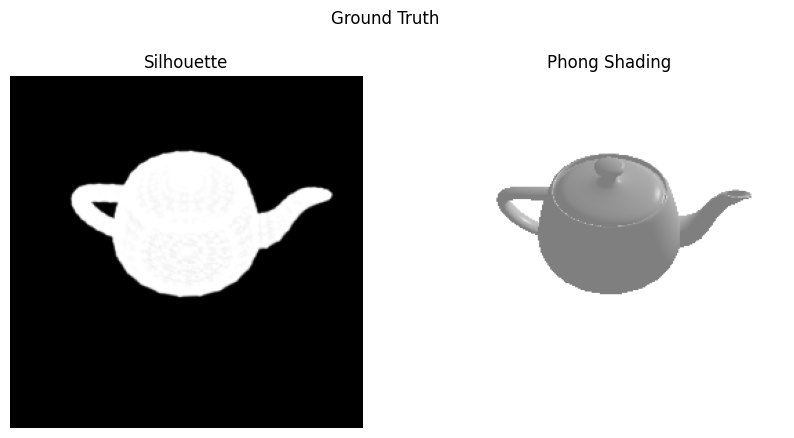

In [148]:
# Ground truth parameters

params = {
    "dist": 3,
    "elev": 50,
    "azim": 5
}

silhoutte_gt_teapot, phong_gt_teapot, R_gt, T_gt = get_ground_truth(teapot_mesh, silhoutte_renderer, phong_renderer, params, device)
plot_images(silhoutte_gt_teapot, phong_gt_teapot)

In [149]:
print("Ground truth rotation matrix")
print(R_gt)

print("Ground truth translation vector")
print(T_gt)

Ground truth rotation matrix
tensor([[[-0.9962, -0.0668, -0.0560],
         [ 0.0000,  0.6428, -0.7660],
         [ 0.0872, -0.7631, -0.6403]]])
Ground truth translation vector
tensor([[ 1.9490e-09, -4.3873e-08,  3.0000e+00]])


In [150]:
# Initialize R_init and T_init

# Rotation angles in degrees around x, y, z axes
# The ground truth rotation matrix R_gt is rotated by 
# Rot_x, Rot_y, Rot_z degrees around x, y, z axes respectively

Rot_x = 15
Rot_y = 15
Rot_z = 15

# Translation deltas along x, y, z axes
# The ground truth translation vector T_gt is translated by
# delx, dely, delz along x, y, z axes respectively

delx = 1
dely = 0
delz = 1

R_init, T_init = initialize_R_T(R_gt, T_gt, Rot_x, Rot_y, Rot_z, delx, dely, delz)
R_init_copy = R_init.clone()
T_init_copy = T_init.clone()

np.save("data/teapot_R_init_1.npy", R_init.cpu().numpy())
np.save("data/teapot_T_init_1.npy", T_init.cpu().numpy())

In [151]:
print("Initialized rotation matrix")
print(R_init)

print("Initialized translation vector")
print(T_init)

Initialized rotation matrix
tensor([[[-0.9026, -0.4168, -0.1079],
         [-0.2652,  0.7356, -0.6234],
         [ 0.3392, -0.5340, -0.7745]]])
Initialized translation vector
tensor([[ 1.0000e+00, -4.3873e-08,  4.0000e+00]])


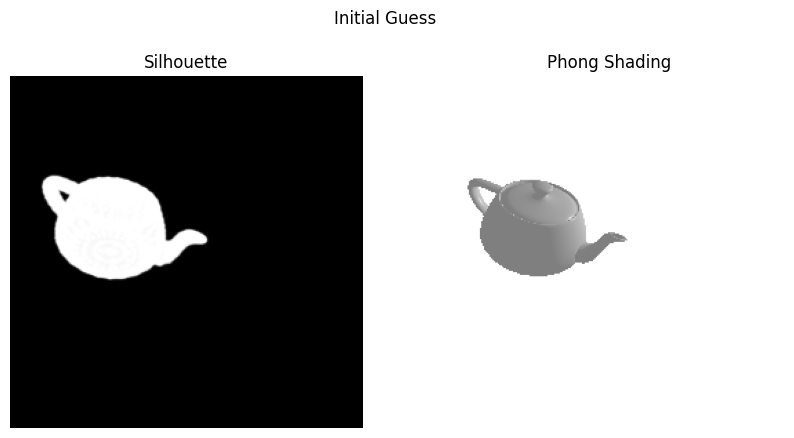

In [152]:
# variances = {
#     "dist": 5,
#     "elev": 30,
#     "azim": 30
# }

# # Initial guess for R and T
# R_init, T_init = get_initial_R_T(params=params, variances=variances, deltaT=0.2, device=device)

# # # # save R and T to a file
# np.save("data/teapot_R_init_1.npy", R_init.cpu().numpy())
# np.save("data/teapot_T_init_1.npy", T_init.cpu().numpy())

# read R and T from a file
# R_init = torch.tensor(np.load("data/teapot_R_init_1.npy")).to(device)
# T_init = torch.tensor(np.load("data/teapot_T_init_1.npy")).to(device)

plot_initial_guess(teapot_mesh, silhoutte_renderer, phong_renderer, R_init, T_init)



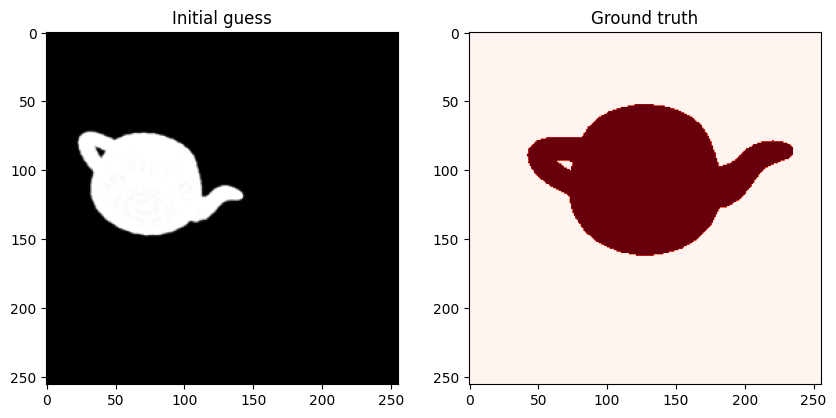

  0%|          | 0/50 [00:08<?, ?it/s]

iteration: 0, loss: 10292.087890625


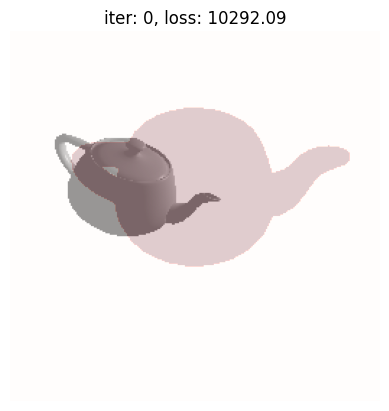

  4%|▍         | 2/50 [00:16<06:31,  8.16s/it]

iteration: 1, loss: 9598.7607421875


  6%|▌         | 3/50 [00:24<06:17,  8.03s/it]

iteration: 2, loss: 8959.89453125


  8%|▊         | 4/50 [00:31<06:02,  7.87s/it]

iteration: 3, loss: 8499.140625


 10%|█         | 5/50 [00:39<05:51,  7.81s/it]

iteration: 4, loss: 8194.2333984375


 10%|█         | 5/50 [00:47<05:51,  7.81s/it]

iteration: 5, loss: 7985.0322265625


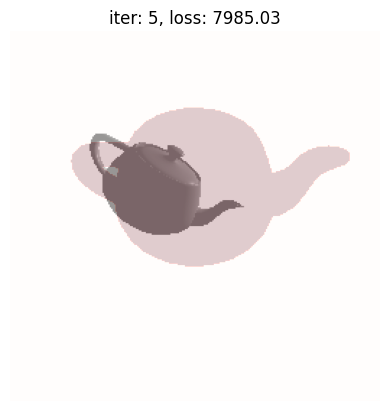

 14%|█▍        | 7/50 [00:54<05:30,  7.69s/it]

iteration: 6, loss: 7849.1513671875


 16%|█▌        | 8/50 [01:02<05:17,  7.57s/it]

iteration: 7, loss: 7737.8681640625


 18%|█▊        | 9/50 [01:09<05:05,  7.44s/it]

iteration: 8, loss: 7621.9375


 20%|██        | 10/50 [01:16<04:54,  7.37s/it]

iteration: 9, loss: 7524.900390625


 20%|██        | 10/50 [01:23<04:54,  7.37s/it]

iteration: 10, loss: 7471.4599609375


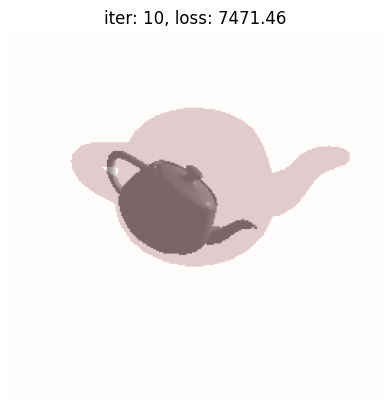

 24%|██▍       | 12/50 [01:31<04:40,  7.38s/it]

iteration: 11, loss: 7407.28515625


 26%|██▌       | 13/50 [01:38<04:32,  7.36s/it]

iteration: 12, loss: 7315.84326171875


 28%|██▊       | 14/50 [01:46<04:25,  7.39s/it]

iteration: 13, loss: 7303.52099609375


 30%|███       | 15/50 [01:53<04:19,  7.41s/it]

iteration: 14, loss: 7249.85888671875


 30%|███       | 15/50 [02:01<04:19,  7.41s/it]

iteration: 15, loss: 7118.8701171875


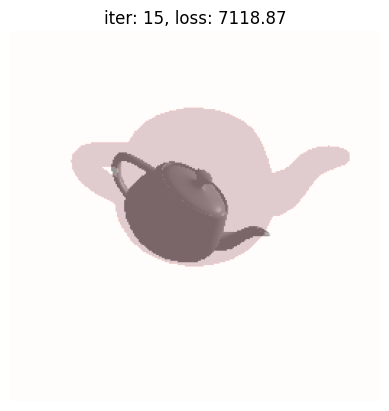

 34%|███▍      | 17/50 [02:09<04:08,  7.55s/it]

iteration: 16, loss: 6971.984375


 36%|███▌      | 18/50 [02:16<04:02,  7.58s/it]

iteration: 17, loss: 6855.19921875


 38%|███▊      | 19/50 [02:24<03:56,  7.64s/it]

iteration: 18, loss: 6732.97119140625


 40%|████      | 20/50 [02:32<03:51,  7.72s/it]

iteration: 19, loss: 6596.5634765625


 40%|████      | 20/50 [02:40<03:51,  7.72s/it]

iteration: 20, loss: 6468.0244140625


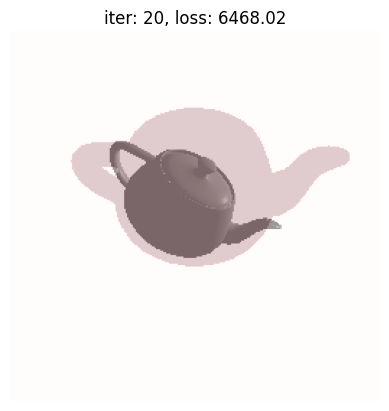

 44%|████▍     | 22/50 [02:48<03:43,  7.97s/it]

iteration: 21, loss: 6333.88720703125


 46%|████▌     | 23/50 [02:57<03:39,  8.12s/it]

iteration: 22, loss: 6183.66796875


 48%|████▊     | 24/50 [03:05<03:34,  8.26s/it]

iteration: 23, loss: 6005.83203125


 50%|█████     | 25/50 [03:14<03:28,  8.35s/it]

iteration: 24, loss: 5794.25830078125


 50%|█████     | 25/50 [03:23<03:28,  8.35s/it]

iteration: 25, loss: 5571.13916015625


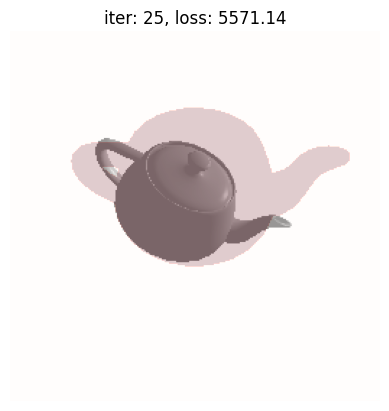

 54%|█████▍    | 27/50 [03:32<03:21,  8.75s/it]

iteration: 26, loss: 5433.50439453125


 56%|█████▌    | 28/50 [03:41<03:15,  8.87s/it]

iteration: 27, loss: 5194.84521484375


 58%|█████▊    | 29/50 [03:50<03:08,  8.96s/it]

iteration: 28, loss: 4831.50732421875


 60%|██████    | 30/50 [04:00<03:01,  9.09s/it]

iteration: 29, loss: 4409.77880859375


 60%|██████    | 30/50 [04:09<03:01,  9.09s/it]

iteration: 30, loss: 4029.02880859375


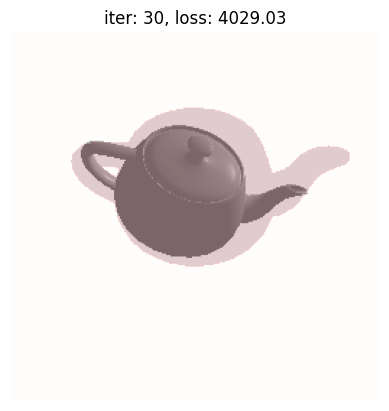

 64%|██████▍   | 32/50 [04:19<02:48,  9.38s/it]

iteration: 31, loss: 3601.558349609375


 66%|██████▌   | 33/50 [04:29<02:40,  9.45s/it]

iteration: 32, loss: 3128.082275390625


 68%|██████▊   | 34/50 [04:39<02:32,  9.56s/it]

iteration: 33, loss: 2755.81640625


 70%|███████   | 35/50 [04:49<02:25,  9.68s/it]

iteration: 34, loss: 2464.9326171875


 70%|███████   | 35/50 [04:59<02:25,  9.68s/it]

iteration: 35, loss: 2073.96337890625


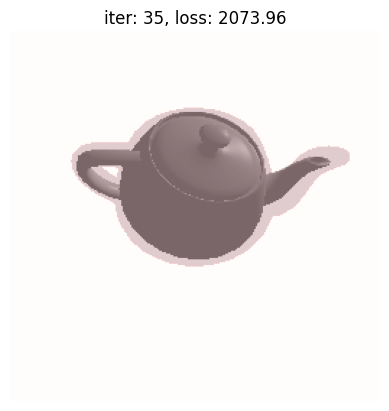

 74%|███████▍  | 37/50 [05:09<02:10, 10.01s/it]

iteration: 36, loss: 1512.779296875


 76%|███████▌  | 38/50 [05:20<02:01, 10.16s/it]

iteration: 37, loss: 1471.013671875


 78%|███████▊  | 39/50 [05:31<01:54, 10.41s/it]

iteration: 38, loss: 1212.9735107421875


 80%|████████  | 40/50 [05:42<01:45, 10.56s/it]

iteration: 39, loss: 1283.867919921875


 80%|████████  | 40/50 [05:53<01:45, 10.56s/it]

iteration: 40, loss: 1442.2713623046875


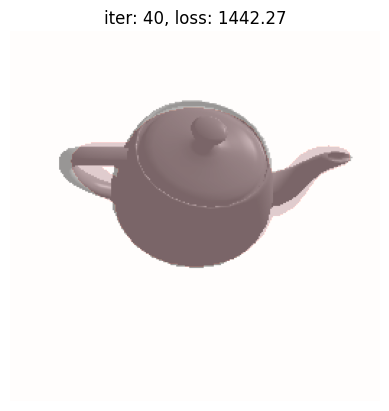

 84%|████████▍ | 42/50 [06:04<01:27, 10.93s/it]

iteration: 41, loss: 1593.3438720703125


 86%|████████▌ | 43/50 [06:15<01:17, 11.01s/it]

iteration: 42, loss: 1858.0364990234375


 88%|████████▊ | 44/50 [06:27<01:06, 11.07s/it]

iteration: 43, loss: 1738.07421875


 90%|█████████ | 45/50 [06:38<00:55, 11.12s/it]

iteration: 44, loss: 1476.0244140625


 90%|█████████ | 45/50 [06:49<00:55, 11.12s/it]

iteration: 45, loss: 1345.3658447265625


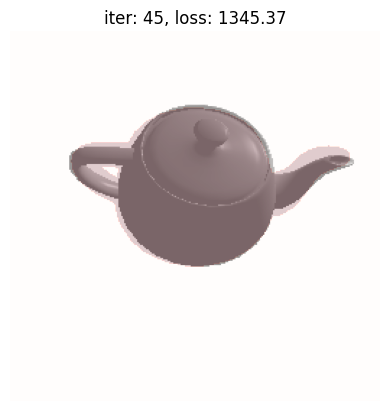

 94%|█████████▍| 47/50 [07:00<00:33, 11.12s/it]

iteration: 46, loss: 1180.68115234375


 96%|█████████▌| 48/50 [07:12<00:22, 11.36s/it]

iteration: 47, loss: 885.7992553710938


 98%|█████████▊| 49/50 [07:23<00:11, 11.18s/it]

iteration: 48, loss: 838.68359375


100%|██████████| 50/50 [07:34<00:00,  9.08s/it]


iteration: 49, loss: 823.0580444335938


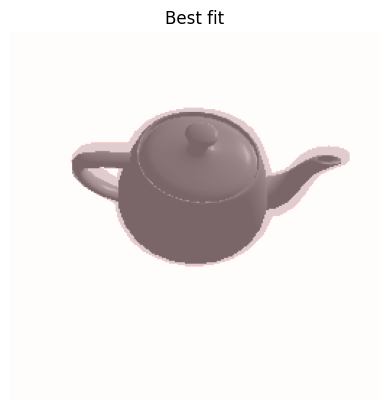

In [153]:
losses, parameter_updates, R_min, T_min = train_angle_axis_model(teapot_mesh, silhoutte_gt_teapot, R_init, T_init, silhoutte_renderer, phong_renderer, obj_name, 50, device)

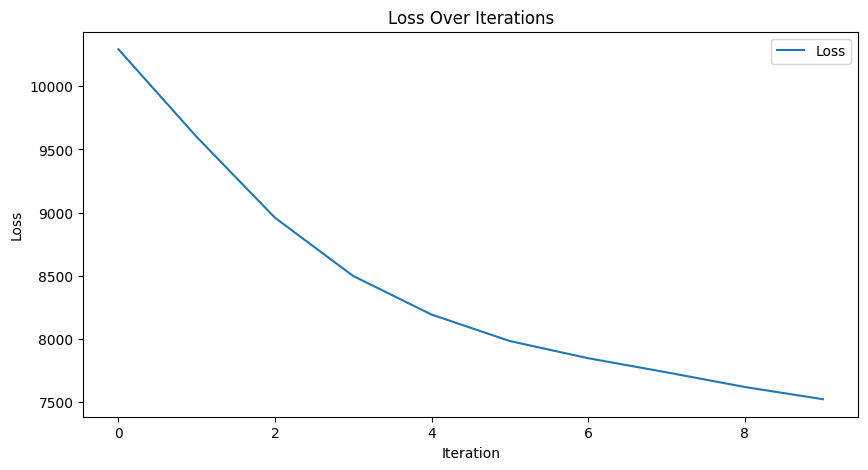

In [140]:
plot_losses(losses)

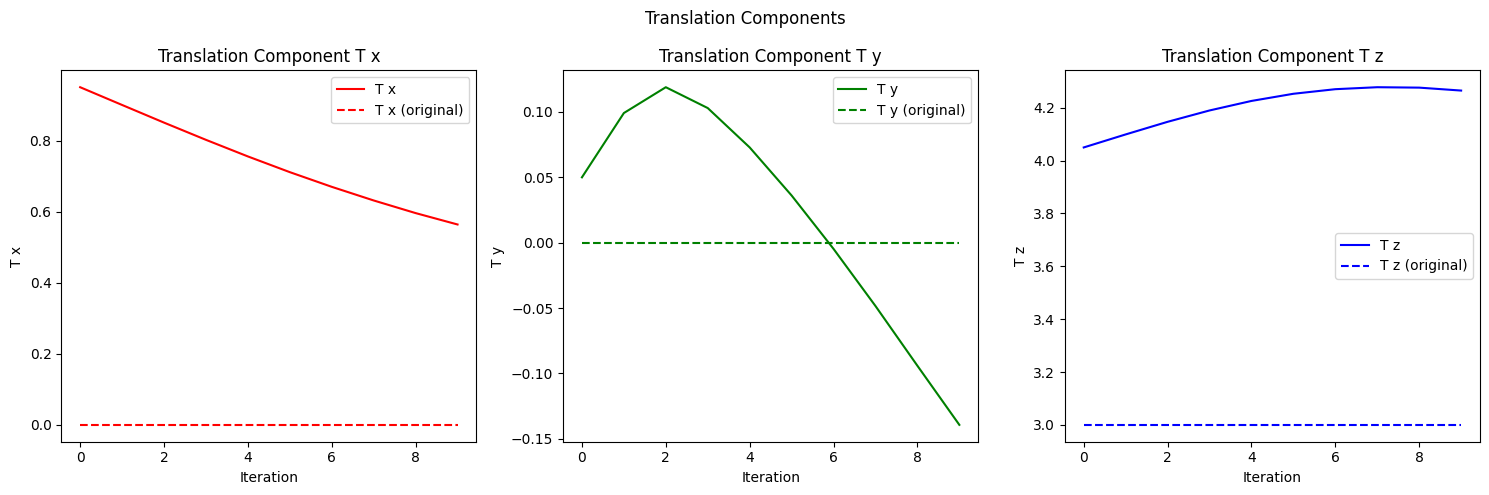

In [141]:
plot_translations(T_gt, parameter_updates)

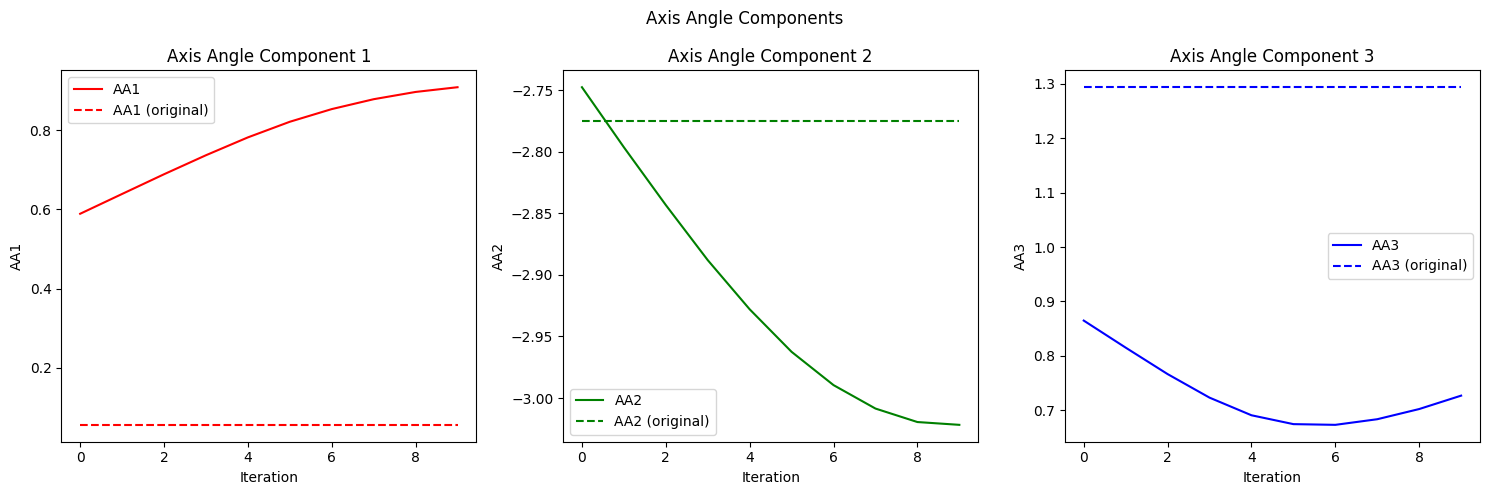

In [142]:
plot_axis_angles(R_gt, parameter_updates)

In [121]:

# R_init = torch.tensor(np.load("data/teapot_R_init_1.npy")).to(device)
# T_init = torch.tensor(np.load("data/teapot_T_init_1.npy")).to(device)

print("Ground truth R:", R_gt)
print("Initial R:", R_init)
print("Estimated R:", R_min)
print("\n")

print("Ground truth T:", T_gt)
print("Initial T:", T_init)
print("Estimated T:", T_min.detach())
print("\n")



Ground truth R: tensor([[[-0.9962, -0.0668, -0.0560],
         [ 0.0000,  0.6428, -0.7660],
         [ 0.0872, -0.7631, -0.6403]]])
Initial R: tensor([[[-0.9962, -0.0668, -0.0560],
         [ 0.0000,  0.6428, -0.7660],
         [ 0.0872, -0.7631, -0.6403]]])
Estimated R: tensor([[[-0.9869,  0.0730,  0.1440],
         [-0.1050,  0.3872, -0.9160],
         [-0.1227, -0.9191, -0.3745]]])


Ground truth T: tensor([[ 1.9490e-09, -4.3873e-08,  3.0000e+00]])
Initial T: tensor([[1.0000, 1.0000, 4.0000]])
Estimated T: tensor([[0.0146, 0.0875, 2.8770]])




## 2nd initial condition

In [68]:
teapot_path = "data/teapot.obj"
obj_name = teapot_path.split(".")[-2].split("/")[-1]
print("Loading", obj_name)
teapot_mesh = load_mesh(teapot_path, device=device, scale=1)
silhoutte_renderer, phong_renderer = get_renderers(image_size=256, device=device)

Loading teapot


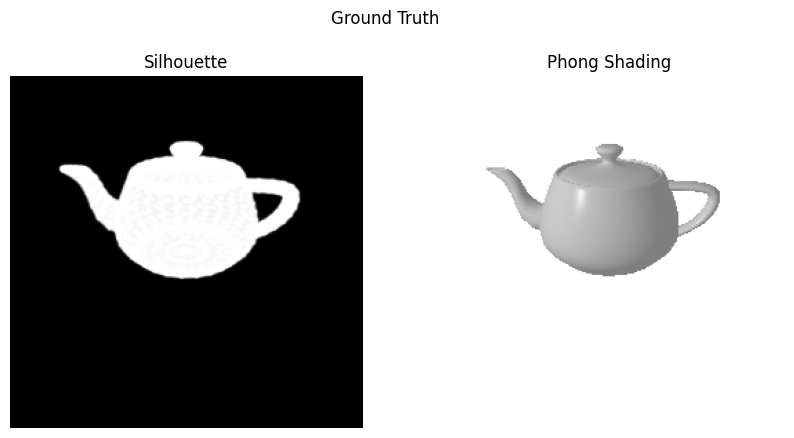

In [70]:
# Ground truth parameters

params = {
    "dist": 3,
    "elev": 150,
    "azim": 5
}

silhoutte_gt_teapot, phong_gt_teapot, R_gt, T_gt = get_ground_truth(teapot_mesh, silhoutte_renderer, phong_renderer, params, device)
plot_images(silhoutte_gt_teapot, phong_gt_teapot)

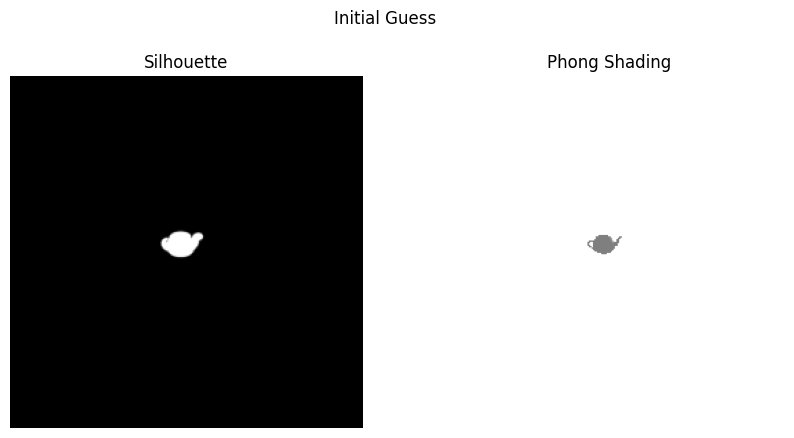

In [80]:
variances = {
    "dist": 10,
    "elev": 30,
    "azim": 30
}

# # Initial guess for R and T
R_init, T_init = get_initial_R_T(params=params, variances=variances, deltaT=0.2, device=device)

# # # save R and T to a file
np.save("data/teapot_R_init_lie1.npy", R_init.cpu().numpy())
np.save("data/teapot_T_init_lie1.npy", T_init.cpu().numpy())

# read R and T from a file
R_init = torch.tensor(np.load("data/teapot_R_init_lie1.npy")).to(device)
T_init = torch.tensor(np.load("data/teapot_T_init_lie1.npy")).to(device)

plot_initial_guess(teapot_mesh, silhoutte_renderer, phong_renderer, R_init, T_init)



In [81]:
print("Ground truth R:", R_gt)
print("Initial R:", R_init)

print("Ground truth T:", T_gt)
print("Initial T:", T_init)

# print difference
print("Difference in R:", torch.norm(R_gt - R_init))
print("Difference in T:", torch.norm(T_gt - T_init))

Ground truth R: tensor([[[ 0.9962,  0.0436,  0.0755],
         [ 0.0000,  0.8660, -0.5000],
         [-0.0872,  0.4981,  0.8627]]])
Initial R: tensor([[[-0.9734,  0.0873, -0.2117],
         [ 0.0000,  0.9245,  0.3812],
         [ 0.2289,  0.3711, -0.8999]]])
Ground truth T: tensor([[-1.0295e-08,  1.6809e-08,  3.0000e+00]])
Initial T: tensor([[ 0.3282,  0.0182, 17.1446]])
Difference in R: tensor(2.8226)
Difference in T: tensor(14.1484)


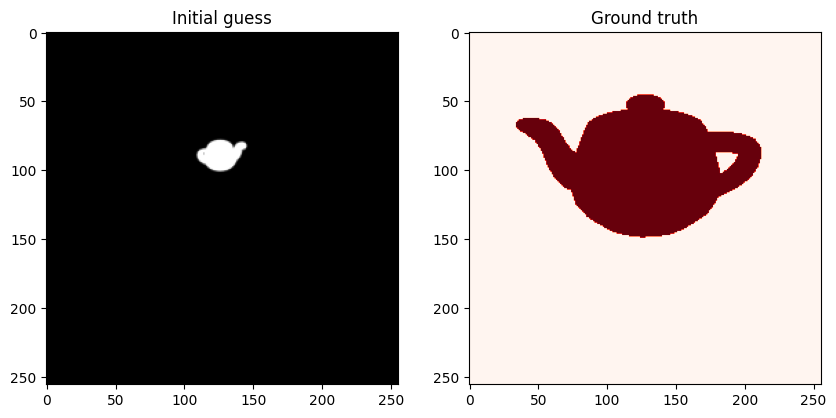

  0%|          | 0/250 [00:02<?, ?it/s]

iteration: 0, loss: 10014.0595703125


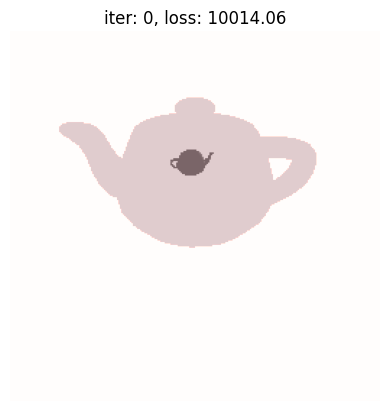

  1%|          | 2/250 [00:04<09:48,  2.37s/it]

iteration: 1, loss: 10008.1591796875


  1%|          | 3/250 [00:07<09:28,  2.30s/it]

iteration: 2, loss: 10003.900390625


  2%|▏         | 4/250 [00:09<09:17,  2.27s/it]

iteration: 3, loss: 10000.962890625


  2%|▏         | 5/250 [00:11<09:09,  2.24s/it]

iteration: 4, loss: 9997.2041015625


  2%|▏         | 5/250 [00:13<09:09,  2.24s/it]

iteration: 5, loss: 9993.771484375


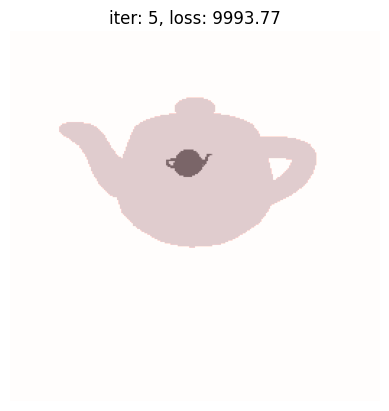

  3%|▎         | 7/250 [00:16<09:27,  2.34s/it]

iteration: 6, loss: 9991.1328125


  3%|▎         | 8/250 [00:18<09:21,  2.32s/it]

iteration: 7, loss: 9987.275390625


  4%|▎         | 9/250 [00:20<09:20,  2.33s/it]

iteration: 8, loss: 9983.638671875


  4%|▍         | 10/250 [00:23<09:22,  2.34s/it]

iteration: 9, loss: 9979.462890625


  4%|▍         | 10/250 [00:25<09:22,  2.34s/it]

iteration: 10, loss: 9975.853515625


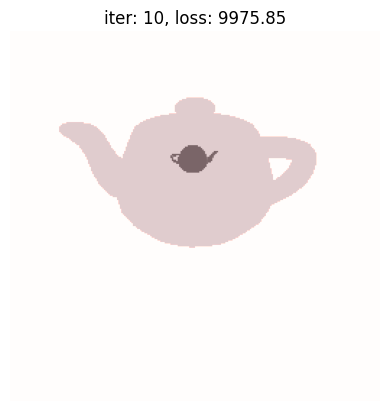

  5%|▍         | 12/250 [00:28<09:29,  2.39s/it]

iteration: 11, loss: 9972.1669921875


  5%|▌         | 13/250 [00:30<09:20,  2.37s/it]

iteration: 12, loss: 9968.41796875


  6%|▌         | 14/250 [00:32<09:16,  2.36s/it]

iteration: 13, loss: 9964.5859375


  6%|▌         | 15/250 [00:35<09:16,  2.37s/it]

iteration: 14, loss: 9960.130859375


  6%|▌         | 15/250 [00:37<09:16,  2.37s/it]

iteration: 15, loss: 9956.919921875


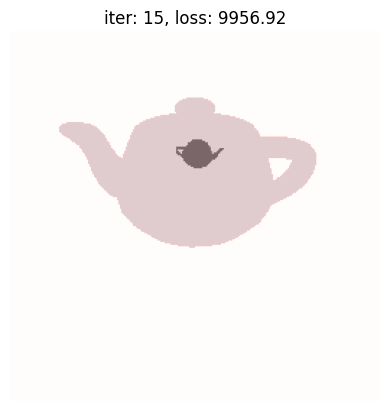

  7%|▋         | 17/250 [00:40<09:28,  2.44s/it]

iteration: 16, loss: 9952.54296875


  7%|▋         | 18/250 [00:42<09:24,  2.43s/it]

iteration: 17, loss: 9948.4697265625


  8%|▊         | 19/250 [00:45<09:21,  2.43s/it]

iteration: 18, loss: 9943.5751953125


  8%|▊         | 20/250 [00:47<09:16,  2.42s/it]

iteration: 19, loss: 9939.3916015625


  8%|▊         | 20/250 [00:50<09:16,  2.42s/it]

iteration: 20, loss: 9934.9765625


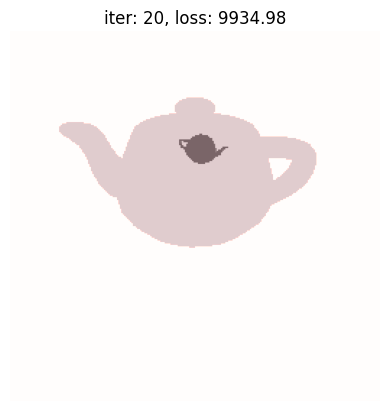

  9%|▉         | 22/250 [00:52<09:28,  2.49s/it]

iteration: 21, loss: 9930.6552734375


  9%|▉         | 23/250 [00:55<09:29,  2.51s/it]

iteration: 22, loss: 9926.30859375


 10%|▉         | 24/250 [00:57<09:26,  2.51s/it]

iteration: 23, loss: 9922.58203125


 10%|█         | 25/250 [01:00<09:24,  2.51s/it]

iteration: 24, loss: 9917.6015625


 10%|█         | 25/250 [01:02<09:24,  2.51s/it]

iteration: 25, loss: 9913.8232421875


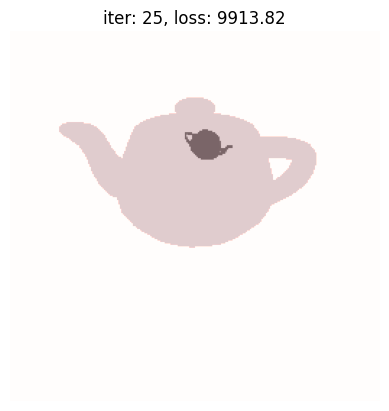

 11%|█         | 27/250 [01:05<09:37,  2.59s/it]

iteration: 26, loss: 9908.5322265625


 11%|█         | 28/250 [01:08<09:30,  2.57s/it]

iteration: 27, loss: 9903.548828125


 12%|█▏        | 29/250 [01:10<09:26,  2.56s/it]

iteration: 28, loss: 9898.56640625


 12%|█▏        | 30/250 [01:13<09:33,  2.61s/it]

iteration: 29, loss: 9893.7353515625


 12%|█▏        | 30/250 [01:16<09:33,  2.61s/it]

iteration: 30, loss: 9888.22265625


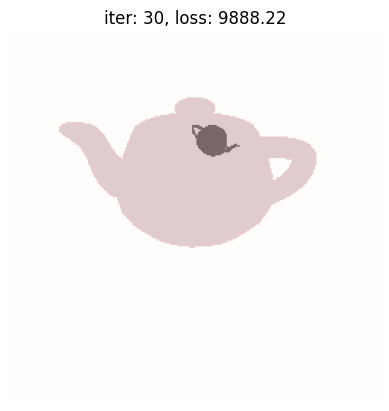

 13%|█▎        | 32/250 [01:18<09:40,  2.66s/it]

iteration: 31, loss: 9883.1142578125


 13%|█▎        | 33/250 [01:21<09:56,  2.75s/it]

iteration: 32, loss: 9878.01953125


 14%|█▎        | 34/250 [01:24<09:46,  2.71s/it]

iteration: 33, loss: 9872.7958984375


 14%|█▍        | 35/250 [01:27<09:41,  2.70s/it]

iteration: 34, loss: 9867.318359375


 14%|█▍        | 35/250 [01:29<09:41,  2.70s/it]

iteration: 35, loss: 9861.9833984375


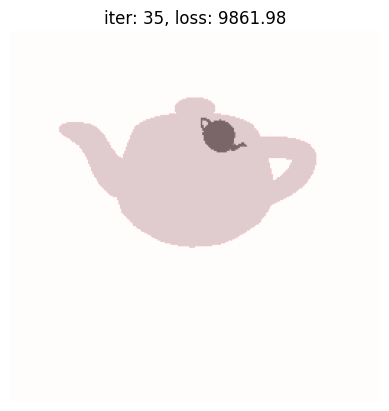

 15%|█▍        | 37/250 [01:32<09:49,  2.77s/it]

iteration: 36, loss: 9855.86328125


 15%|█▌        | 38/250 [01:35<09:41,  2.74s/it]

iteration: 37, loss: 9850.3408203125


 16%|█▌        | 39/250 [01:38<09:47,  2.79s/it]

iteration: 38, loss: 9845.673828125


 16%|█▌        | 40/250 [01:41<09:42,  2.77s/it]

iteration: 39, loss: 9843.7216796875


 16%|█▌        | 40/250 [01:44<09:42,  2.77s/it]

iteration: 40, loss: 9838.2333984375


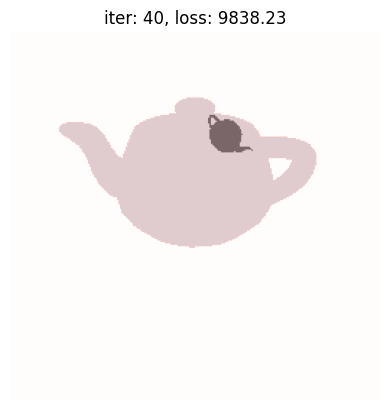

 17%|█▋        | 42/250 [01:47<09:49,  2.83s/it]

iteration: 41, loss: 9833.5908203125


 17%|█▋        | 43/250 [01:49<09:46,  2.83s/it]

iteration: 42, loss: 9827.671875


 18%|█▊        | 44/250 [01:52<09:44,  2.84s/it]

iteration: 43, loss: 9821.748046875


 18%|█▊        | 45/250 [01:55<09:37,  2.82s/it]

iteration: 44, loss: 9817.3779296875


 18%|█▊        | 45/250 [01:58<09:37,  2.82s/it]

iteration: 45, loss: 9812.4453125


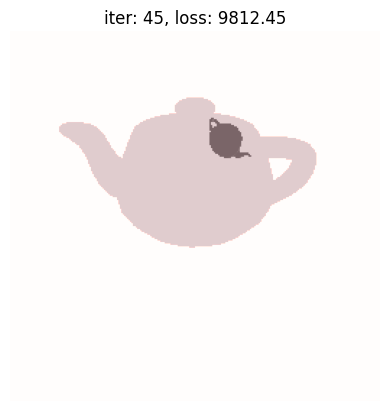

 19%|█▉        | 47/250 [02:01<09:52,  2.92s/it]

iteration: 46, loss: 9807.5859375


 19%|█▉        | 48/250 [02:04<09:43,  2.89s/it]

iteration: 47, loss: 9802.6435546875


 20%|█▉        | 49/250 [02:07<09:36,  2.87s/it]

iteration: 48, loss: 9797.435546875


 20%|██        | 50/250 [02:10<09:32,  2.86s/it]

iteration: 49, loss: 9791.3291015625


 20%|██        | 50/250 [02:12<09:32,  2.86s/it]

iteration: 50, loss: 9785.4765625


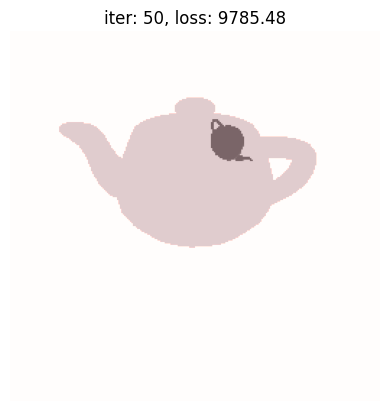

 21%|██        | 52/250 [02:16<09:40,  2.93s/it]

iteration: 51, loss: 9778.546875


 21%|██        | 53/250 [02:19<09:35,  2.92s/it]

iteration: 52, loss: 9772.98828125


 22%|██▏       | 54/250 [02:22<09:40,  2.96s/it]

iteration: 53, loss: 9765.95703125


 22%|██▏       | 55/250 [02:25<09:40,  2.97s/it]

iteration: 54, loss: 9759.2060546875


 22%|██▏       | 55/250 [02:28<09:40,  2.97s/it]

iteration: 55, loss: 9752.4814453125


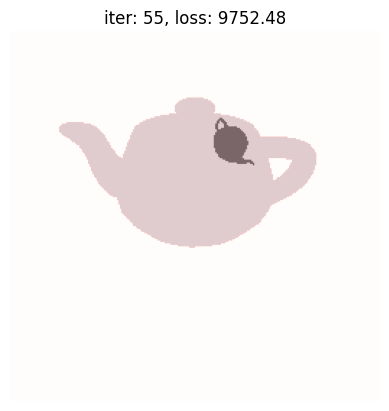

 23%|██▎       | 57/250 [02:31<10:11,  3.17s/it]

iteration: 56, loss: 9745.978515625


 23%|██▎       | 58/250 [02:35<10:21,  3.24s/it]

iteration: 57, loss: 9739.087890625


 24%|██▎       | 59/250 [02:38<10:33,  3.32s/it]

iteration: 58, loss: 9731.3408203125


 24%|██▍       | 60/250 [02:42<10:42,  3.38s/it]

iteration: 59, loss: 9723.78515625


 24%|██▍       | 60/250 [02:45<10:42,  3.38s/it]

iteration: 60, loss: 9716.478515625


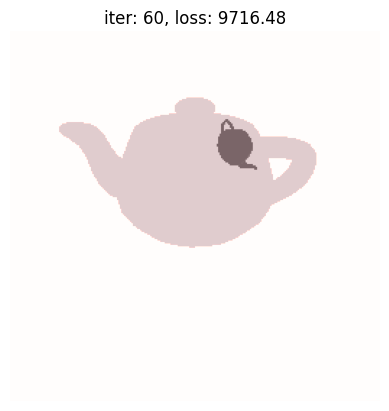

 25%|██▍       | 62/250 [02:49<11:13,  3.58s/it]

iteration: 61, loss: 9709.2822265625


 25%|██▌       | 63/250 [02:53<11:27,  3.68s/it]

iteration: 62, loss: 9701.74609375


 26%|██▌       | 64/250 [02:57<11:52,  3.83s/it]

iteration: 63, loss: 9693.6318359375


 26%|██▌       | 65/250 [03:02<12:11,  3.95s/it]

iteration: 64, loss: 9685.4794921875


 26%|██▌       | 65/250 [03:06<12:11,  3.95s/it]

iteration: 65, loss: 9676.92578125


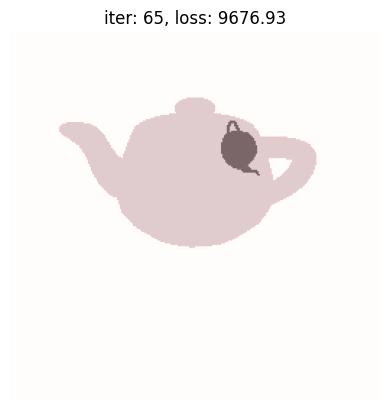

 27%|██▋       | 67/250 [03:11<13:09,  4.31s/it]

iteration: 66, loss: 9668.65625


 27%|██▋       | 68/250 [03:16<13:28,  4.44s/it]

iteration: 67, loss: 9660.06640625


 28%|██▊       | 69/250 [03:21<13:38,  4.52s/it]

iteration: 68, loss: 9651.6103515625


 28%|██▊       | 70/250 [03:25<13:48,  4.60s/it]

iteration: 69, loss: 9642.4912109375


 28%|██▊       | 70/250 [03:30<13:48,  4.60s/it]

iteration: 70, loss: 9632.8623046875


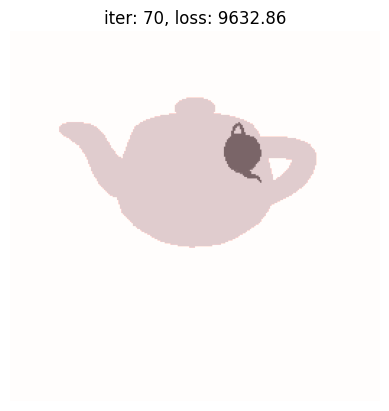

 29%|██▉       | 72/250 [03:36<14:37,  4.93s/it]

iteration: 71, loss: 9623.701171875


 29%|██▉       | 73/250 [03:41<14:36,  4.95s/it]

iteration: 72, loss: 9613.9931640625


 30%|██▉       | 74/250 [03:46<14:46,  5.04s/it]

iteration: 73, loss: 9604.21484375


 30%|███       | 75/250 [03:51<14:47,  5.07s/it]

iteration: 74, loss: 9593.3017578125


 30%|███       | 75/250 [03:56<14:47,  5.07s/it]

iteration: 75, loss: 9583.234375


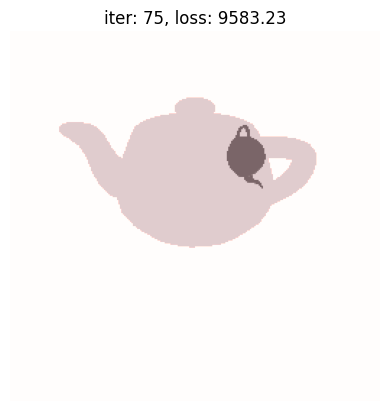

 31%|███       | 77/250 [04:03<15:26,  5.36s/it]

iteration: 76, loss: 9572.9228515625


 31%|███       | 78/250 [04:08<15:22,  5.36s/it]

iteration: 77, loss: 9562.8203125


 32%|███▏      | 79/250 [04:13<15:02,  5.28s/it]

iteration: 78, loss: 9552.419921875


 32%|███▏      | 80/250 [04:19<15:09,  5.35s/it]

iteration: 79, loss: 9540.7626953125


 32%|███▏      | 80/250 [04:23<15:09,  5.35s/it]

iteration: 80, loss: 9528.6669921875


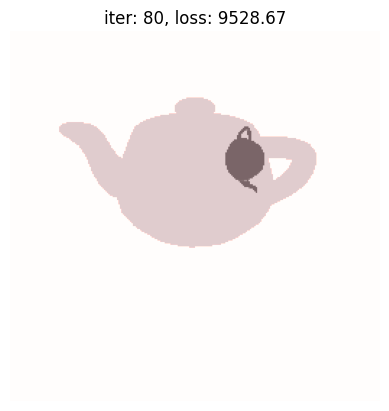

 33%|███▎      | 82/250 [04:29<15:00,  5.36s/it]

iteration: 81, loss: 9517.197265625


 33%|███▎      | 83/250 [04:35<14:54,  5.36s/it]

iteration: 82, loss: 9505.0048828125


 34%|███▎      | 84/250 [04:40<14:29,  5.24s/it]

iteration: 83, loss: 9492.9140625


 34%|███▍      | 85/250 [04:45<14:17,  5.20s/it]

iteration: 84, loss: 9480.14453125


 34%|███▍      | 85/250 [04:50<14:17,  5.20s/it]

iteration: 85, loss: 9466.5419921875


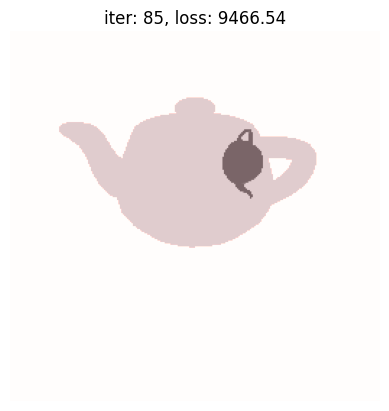

 35%|███▍      | 87/250 [04:56<14:18,  5.27s/it]

iteration: 86, loss: 9453.900390625


 35%|███▌      | 88/250 [05:01<14:03,  5.21s/it]

iteration: 87, loss: 9439.5791015625


 36%|███▌      | 89/250 [05:06<13:48,  5.14s/it]

iteration: 88, loss: 9425.5546875


 36%|███▌      | 90/250 [05:11<14:00,  5.26s/it]

iteration: 89, loss: 9411.201171875


 36%|███▌      | 90/250 [05:16<14:00,  5.26s/it]

iteration: 90, loss: 9396.236328125


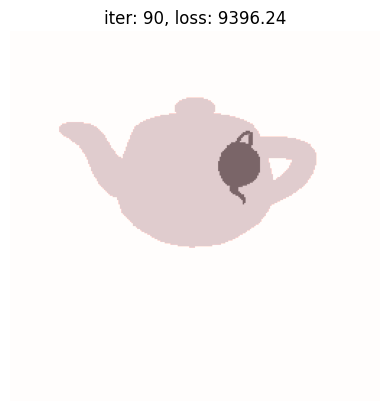

 37%|███▋      | 92/250 [05:22<14:00,  5.32s/it]

iteration: 91, loss: 9380.083984375


 37%|███▋      | 93/250 [05:27<14:07,  5.40s/it]

iteration: 92, loss: 9363.140625


 38%|███▊      | 94/250 [05:33<14:07,  5.43s/it]

iteration: 93, loss: 9345.658203125


 38%|███▊      | 95/250 [05:38<13:49,  5.35s/it]

iteration: 94, loss: 9328.1025390625


 38%|███▊      | 95/250 [05:42<13:49,  5.35s/it]

iteration: 95, loss: 9310.9072265625


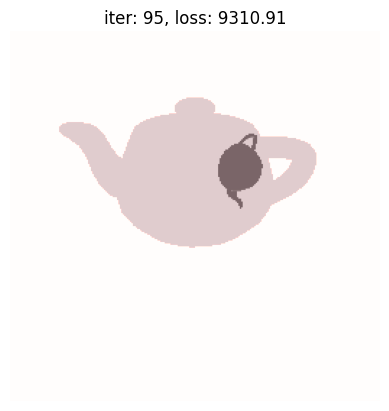

 39%|███▉      | 97/250 [05:47<12:30,  4.91s/it]

iteration: 96, loss: 9291.7646484375


 39%|███▉      | 98/250 [05:53<12:54,  5.09s/it]

iteration: 97, loss: 9272.412109375


 40%|███▉      | 99/250 [05:58<13:18,  5.29s/it]

iteration: 98, loss: 9252.6474609375


 40%|████      | 100/250 [06:04<13:36,  5.44s/it]

iteration: 99, loss: 9232.8212890625


 40%|████      | 100/250 [06:10<13:36,  5.44s/it]

iteration: 100, loss: 9211.2421875


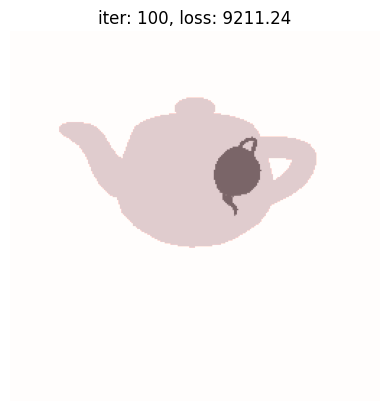

 41%|████      | 102/250 [06:16<14:10,  5.75s/it]

iteration: 101, loss: 9189.02734375


 41%|████      | 103/250 [06:22<14:11,  5.79s/it]

iteration: 102, loss: 9165.455078125


 42%|████▏     | 104/250 [06:28<14:07,  5.81s/it]

iteration: 103, loss: 9141.251953125


 42%|████▏     | 105/250 [06:34<14:06,  5.84s/it]

iteration: 104, loss: 9115.6318359375


 42%|████▏     | 105/250 [06:40<14:06,  5.84s/it]

iteration: 105, loss: 9088.4453125


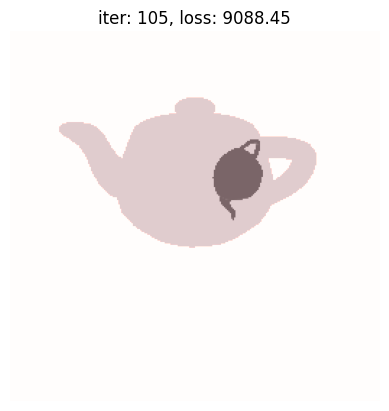

 43%|████▎     | 107/250 [06:47<14:31,  6.09s/it]

iteration: 106, loss: 9060.802734375


 43%|████▎     | 108/250 [06:53<14:34,  6.16s/it]

iteration: 107, loss: 9032.0537109375


 44%|████▎     | 109/250 [06:59<14:28,  6.16s/it]

iteration: 108, loss: 9001.13671875


 44%|████▍     | 110/250 [07:04<13:34,  5.82s/it]

iteration: 109, loss: 8969.4892578125


 44%|████▍     | 110/250 [07:09<13:34,  5.82s/it]

iteration: 110, loss: 8935.8212890625


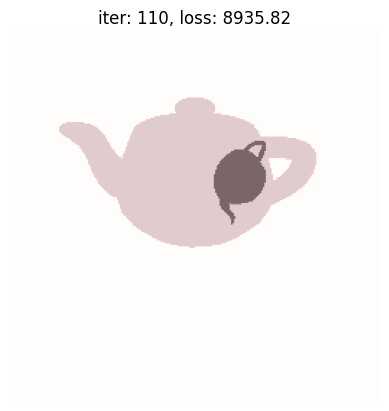

 45%|████▍     | 112/250 [07:16<13:22,  5.82s/it]

iteration: 111, loss: 8901.4853515625


 45%|████▌     | 113/250 [07:21<13:02,  5.71s/it]

iteration: 112, loss: 8864.994140625


 46%|████▌     | 114/250 [07:28<13:16,  5.86s/it]

iteration: 113, loss: 8826.8525390625


 46%|████▌     | 115/250 [07:33<12:50,  5.70s/it]

iteration: 114, loss: 8787.3193359375


 46%|████▌     | 115/250 [07:40<12:50,  5.70s/it]

iteration: 115, loss: 8746.640625


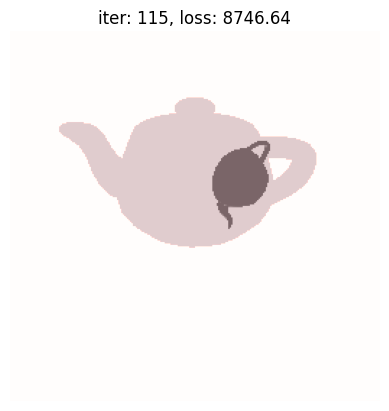

 47%|████▋     | 117/250 [07:47<14:17,  6.45s/it]

iteration: 116, loss: 8703.3740234375


 47%|████▋     | 118/250 [07:54<14:34,  6.63s/it]

iteration: 117, loss: 8660.0576171875


 48%|████▊     | 119/250 [08:01<14:33,  6.67s/it]

iteration: 118, loss: 8613.1435546875


 48%|████▊     | 120/250 [08:08<14:48,  6.83s/it]

iteration: 119, loss: 8563.4765625


 48%|████▊     | 120/250 [08:16<14:48,  6.83s/it]

iteration: 120, loss: 8511.04296875


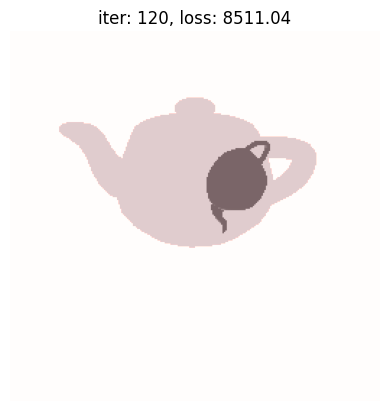

 49%|████▉     | 122/250 [08:24<15:45,  7.38s/it]

iteration: 121, loss: 8455.779296875


 49%|████▉     | 123/250 [08:32<16:01,  7.57s/it]

iteration: 122, loss: 8398.2744140625


 50%|████▉     | 124/250 [08:40<15:58,  7.61s/it]

iteration: 123, loss: 8336.8203125


 50%|█████     | 125/250 [08:48<16:05,  7.73s/it]

iteration: 124, loss: 8270.93359375


 50%|█████     | 125/250 [08:56<16:05,  7.73s/it]

iteration: 125, loss: 8204.1396484375


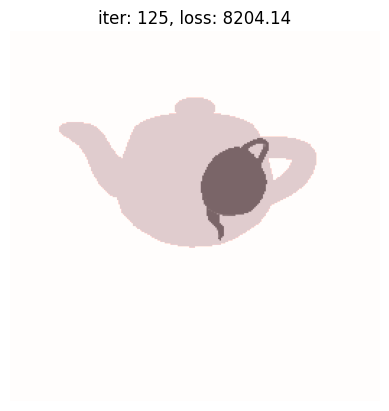

 51%|█████     | 127/250 [09:04<16:19,  7.96s/it]

iteration: 126, loss: 8131.7138671875


 51%|█████     | 128/250 [09:13<16:25,  8.08s/it]

iteration: 127, loss: 8056.51806640625


 52%|█████▏    | 129/250 [09:21<16:24,  8.14s/it]

iteration: 128, loss: 7983.27490234375


 52%|█████▏    | 130/250 [09:29<16:23,  8.19s/it]

iteration: 129, loss: 7895.326171875


 52%|█████▏    | 130/250 [09:38<16:23,  8.19s/it]

iteration: 130, loss: 7808.89892578125


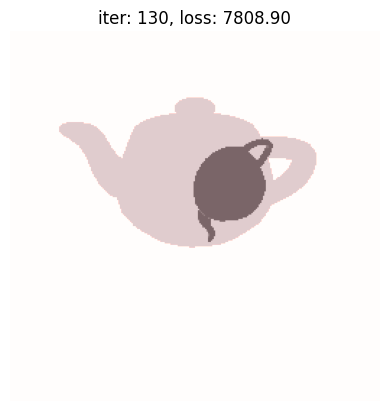

 53%|█████▎    | 132/250 [09:47<16:37,  8.45s/it]

iteration: 131, loss: 7710.58447265625


 53%|█████▎    | 133/250 [09:56<16:44,  8.59s/it]

iteration: 132, loss: 7618.4970703125


 54%|█████▎    | 134/250 [10:04<16:36,  8.59s/it]

iteration: 133, loss: 7500.53125


 54%|█████▍    | 135/250 [10:13<16:24,  8.56s/it]

iteration: 134, loss: 7392.3740234375


 54%|█████▍    | 135/250 [10:21<16:24,  8.56s/it]

iteration: 135, loss: 7264.896484375


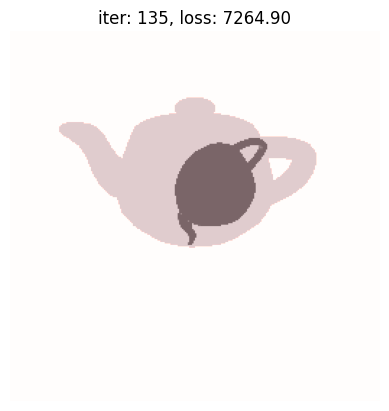

 55%|█████▍    | 137/250 [10:31<16:26,  8.73s/it]

iteration: 136, loss: 7126.591796875


 55%|█████▌    | 138/250 [10:39<16:16,  8.72s/it]

iteration: 137, loss: 6992.361328125


 56%|█████▌    | 139/250 [10:49<16:26,  8.88s/it]

iteration: 138, loss: 6825.81103515625


 56%|█████▌    | 140/250 [10:58<16:28,  8.99s/it]

iteration: 139, loss: 6666.42822265625


 56%|█████▌    | 140/250 [11:07<16:28,  8.99s/it]

iteration: 140, loss: 6478.10888671875


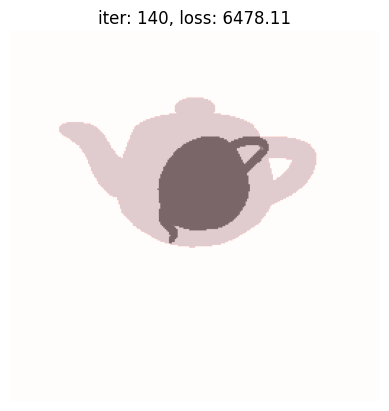

 57%|█████▋    | 142/250 [11:17<16:41,  9.27s/it]

iteration: 141, loss: 6274.21044921875


 57%|█████▋    | 143/250 [11:26<16:32,  9.28s/it]

iteration: 142, loss: 6058.56494140625


 58%|█████▊    | 144/250 [11:36<16:24,  9.29s/it]

iteration: 143, loss: 5809.8232421875


 58%|█████▊    | 145/250 [11:45<16:27,  9.40s/it]

iteration: 144, loss: 5556.91162109375


 58%|█████▊    | 145/250 [11:55<16:27,  9.40s/it]

iteration: 145, loss: 5268.923828125


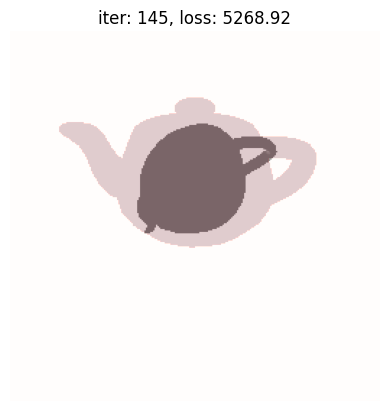

 59%|█████▉    | 147/250 [12:05<16:28,  9.59s/it]

iteration: 146, loss: 4957.56396484375


 59%|█████▉    | 148/250 [12:15<16:37,  9.78s/it]

iteration: 147, loss: 4598.76416015625


 60%|█████▉    | 149/250 [12:25<16:34,  9.84s/it]

iteration: 148, loss: 4213.57470703125


 60%|██████    | 150/250 [12:36<16:43, 10.03s/it]

iteration: 149, loss: 3932.731201171875


 60%|██████    | 150/250 [12:46<16:43, 10.03s/it]

iteration: 150, loss: 3488.437744140625


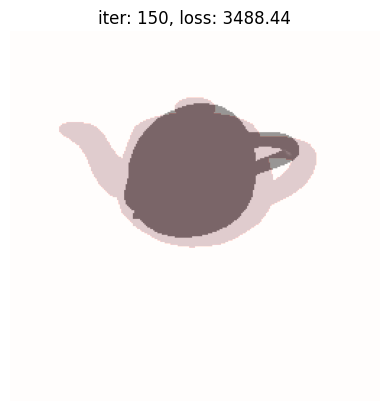

 61%|██████    | 152/250 [12:58<17:21, 10.63s/it]

iteration: 151, loss: 3164.94287109375


 61%|██████    | 153/250 [13:10<17:37, 10.90s/it]

iteration: 152, loss: 2710.440673828125


 62%|██████▏   | 154/250 [13:22<18:08, 11.33s/it]

iteration: 153, loss: 2489.359130859375


 62%|██████▏   | 155/250 [13:34<18:18, 11.56s/it]

iteration: 154, loss: 2421.422607421875


 62%|██████▏   | 155/250 [13:46<18:18, 11.56s/it]

iteration: 155, loss: 2839.9775390625


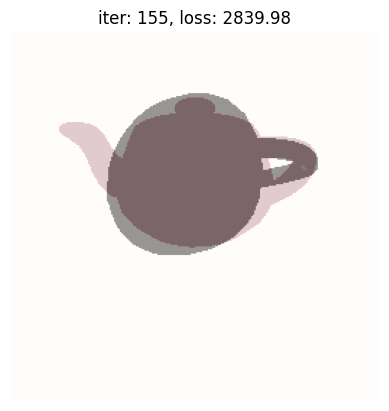

 63%|██████▎   | 157/250 [14:00<18:54, 12.20s/it]

iteration: 156, loss: 2957.685546875


 63%|██████▎   | 158/250 [14:13<19:07, 12.47s/it]

iteration: 157, loss: 2996.00146484375


 64%|██████▎   | 159/250 [14:26<19:14, 12.69s/it]

iteration: 158, loss: 2983.9453125


 64%|██████▍   | 160/250 [14:39<19:05, 12.72s/it]

iteration: 159, loss: 2909.446044921875


 64%|██████▍   | 160/250 [14:52<19:05, 12.72s/it]

iteration: 160, loss: 2514.556884765625


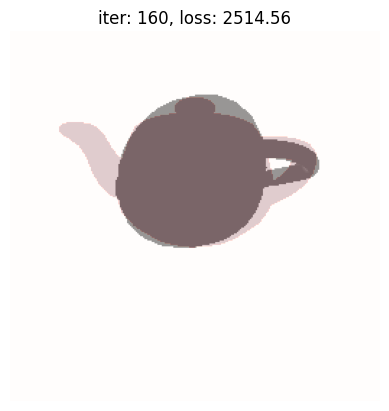

 65%|██████▍   | 162/250 [15:05<18:46, 12.80s/it]

iteration: 161, loss: 2323.521728515625


 65%|██████▌   | 163/250 [15:17<18:31, 12.78s/it]

iteration: 162, loss: 2138.23095703125


 66%|██████▌   | 164/250 [15:30<18:04, 12.61s/it]

iteration: 163, loss: 1989.747802734375


 66%|██████▌   | 165/250 [15:41<17:30, 12.36s/it]

iteration: 164, loss: 2023.7451171875


 66%|██████▌   | 165/250 [15:53<17:30, 12.36s/it]

iteration: 165, loss: 2077.467529296875


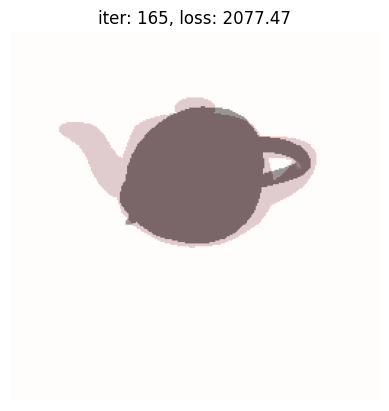

 67%|██████▋   | 167/250 [16:05<16:41, 12.07s/it]

iteration: 166, loss: 2175.4091796875


 67%|██████▋   | 168/250 [16:17<16:23, 12.00s/it]

iteration: 167, loss: 2166.473876953125


 68%|██████▊   | 169/250 [16:28<15:53, 11.77s/it]

iteration: 168, loss: 2202.78271484375


 68%|██████▊   | 170/250 [16:40<15:32, 11.65s/it]

iteration: 169, loss: 2158.642578125


 68%|██████▊   | 170/250 [16:51<15:32, 11.65s/it]

iteration: 170, loss: 2084.794189453125


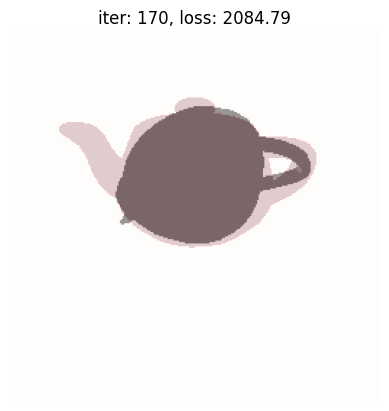

 69%|██████▉   | 172/250 [17:02<14:59, 11.53s/it]

iteration: 171, loss: 2025.9349365234375


 69%|██████▉   | 173/250 [17:14<14:45, 11.50s/it]

iteration: 172, loss: 1920.112060546875


 70%|██████▉   | 174/250 [17:25<14:34, 11.51s/it]

iteration: 173, loss: 1871.2769775390625


 70%|███████   | 175/250 [17:37<14:35, 11.67s/it]

iteration: 174, loss: 1817.1240234375


 70%|███████   | 175/250 [17:50<14:35, 11.67s/it]

iteration: 175, loss: 1860.517333984375


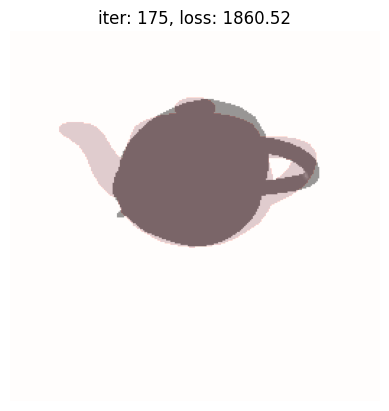

 71%|███████   | 177/250 [18:03<14:45, 12.13s/it]

iteration: 176, loss: 1876.90576171875


 71%|███████   | 178/250 [18:15<14:39, 12.21s/it]

iteration: 177, loss: 1935.9765625


 72%|███████▏  | 179/250 [18:28<14:43, 12.44s/it]

iteration: 178, loss: 1956.6458740234375


 72%|███████▏  | 180/250 [18:40<14:31, 12.44s/it]

iteration: 179, loss: 1944.5201416015625


 72%|███████▏  | 180/250 [18:52<14:31, 12.44s/it]

iteration: 180, loss: 1909.3826904296875


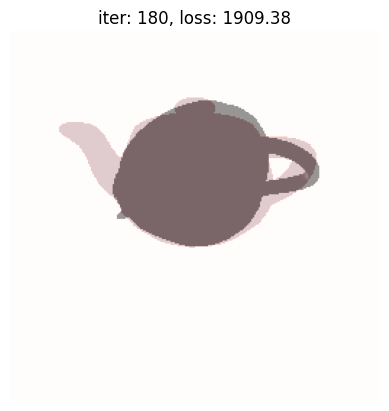

 73%|███████▎  | 182/250 [19:06<14:19, 12.64s/it]

iteration: 181, loss: 1874.1483154296875


 73%|███████▎  | 183/250 [19:18<13:49, 12.38s/it]

iteration: 182, loss: 1834.68896484375


 74%|███████▎  | 184/250 [19:30<13:25, 12.20s/it]

iteration: 183, loss: 1834.5994873046875


 74%|███████▍  | 185/250 [19:41<12:57, 11.96s/it]

iteration: 184, loss: 1836.9510498046875


 74%|███████▍  | 185/250 [19:53<12:57, 11.96s/it]

iteration: 185, loss: 1843.4456787109375


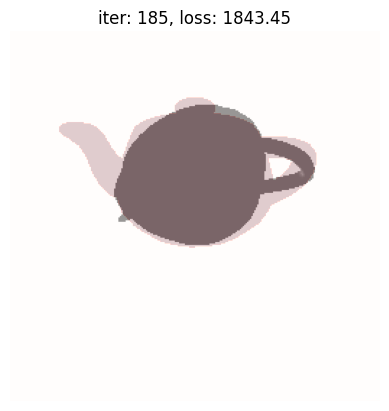

 75%|███████▍  | 187/250 [20:04<12:18, 11.72s/it]

iteration: 186, loss: 1856.75146484375


 75%|███████▌  | 188/250 [20:15<11:52, 11.49s/it]

iteration: 187, loss: 1861.153564453125


 76%|███████▌  | 189/250 [20:26<11:32, 11.36s/it]

iteration: 188, loss: 1855.6219482421875


 76%|███████▌  | 190/250 [20:37<11:15, 11.26s/it]

iteration: 189, loss: 1849.3785400390625


 76%|███████▌  | 190/250 [20:48<11:15, 11.26s/it]

iteration: 190, loss: 1833.28369140625


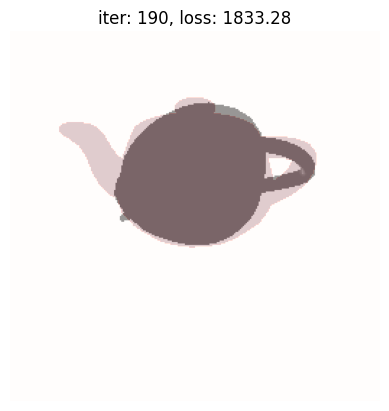

 77%|███████▋  | 192/250 [20:59<10:43, 11.09s/it]

iteration: 191, loss: 1816.5150146484375


 77%|███████▋  | 193/250 [21:10<10:28, 11.02s/it]

iteration: 192, loss: 1809.9150390625


 78%|███████▊  | 194/250 [21:21<10:21, 11.09s/it]

iteration: 193, loss: 1803.463623046875


 78%|███████▊  | 195/250 [21:32<10:06, 11.02s/it]

iteration: 194, loss: 1809.84765625


 78%|███████▊  | 195/250 [21:43<10:06, 11.02s/it]

iteration: 195, loss: 1816.299560546875


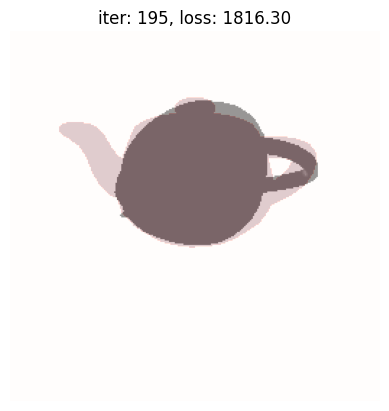

 79%|███████▉  | 197/250 [21:55<09:50, 11.14s/it]

iteration: 196, loss: 1821.733154296875


 79%|███████▉  | 198/250 [22:06<09:41, 11.19s/it]

iteration: 197, loss: 1823.7030029296875


 80%|███████▉  | 199/250 [22:17<09:36, 11.31s/it]

iteration: 198, loss: 1818.5860595703125


 80%|████████  | 200/250 [22:29<09:30, 11.40s/it]

iteration: 199, loss: 1814.81640625


 80%|████████  | 200/250 [22:41<09:30, 11.40s/it]

iteration: 200, loss: 1809.000244140625


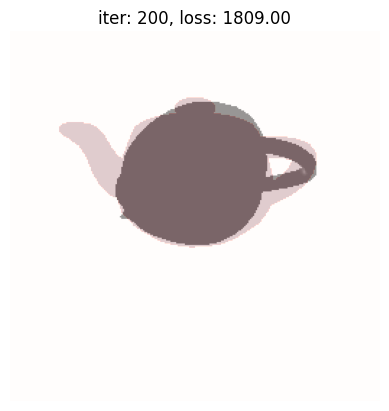

 81%|████████  | 202/250 [22:53<09:15, 11.57s/it]

iteration: 201, loss: 1805.95849609375


 81%|████████  | 203/250 [23:04<09:01, 11.53s/it]

iteration: 202, loss: 1806.97998046875


 82%|████████▏ | 204/250 [23:15<08:47, 11.47s/it]

iteration: 203, loss: 1808.1451416015625


 82%|████████▏ | 205/250 [23:27<08:35, 11.45s/it]

iteration: 204, loss: 1811.2349853515625


 82%|████████▏ | 205/250 [23:38<08:35, 11.45s/it]

iteration: 205, loss: 1811.753662109375


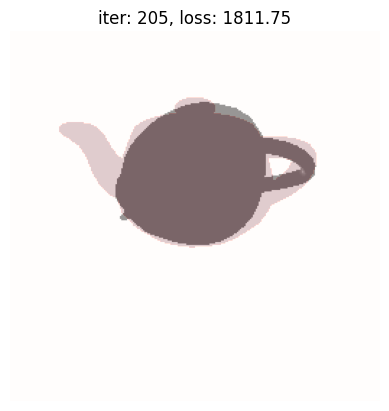

 83%|████████▎ | 207/250 [23:51<08:28, 11.83s/it]

iteration: 206, loss: 1810.2513427734375


 83%|████████▎ | 208/250 [24:03<08:21, 11.94s/it]

iteration: 207, loss: 1808.87255859375


 84%|████████▎ | 209/250 [24:16<08:13, 12.03s/it]

iteration: 208, loss: 1805.03369140625


 84%|████████▍ | 210/250 [24:27<08:00, 12.00s/it]

iteration: 209, loss: 1804.1697998046875


 84%|████████▍ | 210/250 [24:39<08:00, 12.00s/it]

iteration: 210, loss: 1802.7410888671875


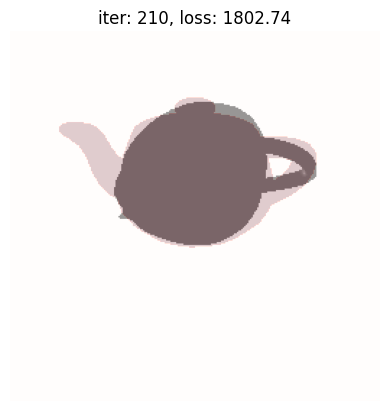

 85%|████████▍ | 212/250 [24:51<07:28, 11.80s/it]

iteration: 211, loss: 1803.9881591796875


 85%|████████▌ | 213/250 [25:02<07:11, 11.65s/it]

iteration: 212, loss: 1804.621337890625


 86%|████████▌ | 214/250 [25:13<06:55, 11.53s/it]

iteration: 213, loss: 1805.1617431640625


 86%|████████▌ | 215/250 [25:25<06:48, 11.68s/it]

iteration: 214, loss: 1806.18896484375


 86%|████████▌ | 215/250 [25:37<06:48, 11.68s/it]

iteration: 215, loss: 1805.5081787109375


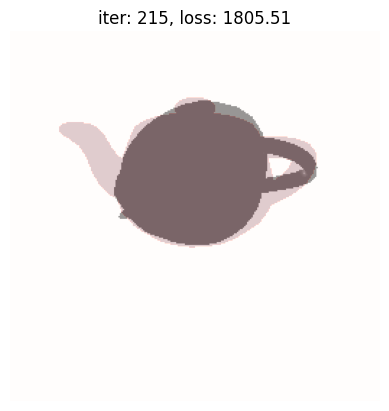

 87%|████████▋ | 217/250 [25:49<06:22, 11.60s/it]

iteration: 216, loss: 1805.2314453125


 87%|████████▋ | 218/250 [26:00<06:03, 11.37s/it]

iteration: 217, loss: 1804.154541015625


 88%|████████▊ | 219/250 [26:11<05:56, 11.52s/it]

iteration: 218, loss: 1803.332763671875


 88%|████████▊ | 220/250 [26:23<05:47, 11.60s/it]

iteration: 219, loss: 1802.98974609375


 88%|████████▊ | 220/250 [26:34<05:47, 11.60s/it]

iteration: 220, loss: 1802.851318359375


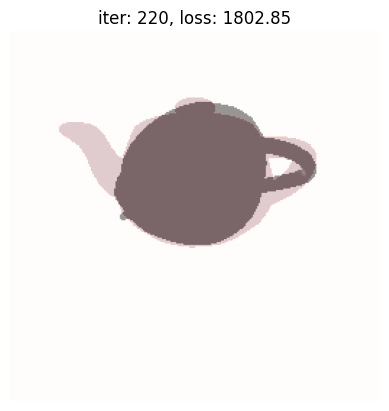

 89%|████████▉ | 222/250 [26:46<05:23, 11.56s/it]

iteration: 221, loss: 1803.3818359375


 89%|████████▉ | 223/250 [26:58<05:13, 11.61s/it]

iteration: 222, loss: 1803.4417724609375


 90%|████████▉ | 224/250 [27:10<05:04, 11.71s/it]

iteration: 223, loss: 1803.50537109375


 90%|█████████ | 225/250 [27:22<04:54, 11.78s/it]

iteration: 224, loss: 1803.5084228515625


 90%|█████████ | 225/250 [27:33<04:54, 11.78s/it]

iteration: 225, loss: 1803.260986328125


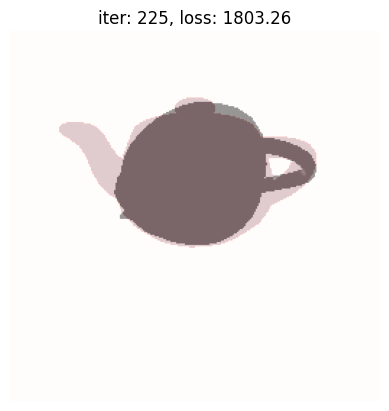

 91%|█████████ | 227/250 [27:46<04:31, 11.81s/it]

iteration: 226, loss: 1802.92822265625


 91%|█████████ | 228/250 [27:57<04:14, 11.58s/it]

iteration: 227, loss: 1802.58349609375


 92%|█████████▏| 229/250 [28:08<03:59, 11.39s/it]

iteration: 228, loss: 1802.580078125


 92%|█████████▏| 230/250 [28:18<03:44, 11.23s/it]

iteration: 229, loss: 1802.6790771484375


 92%|█████████▏| 230/250 [28:30<03:44, 11.23s/it]

iteration: 230, loss: 1802.794921875


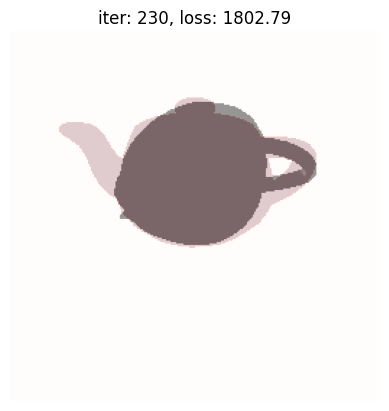

 93%|█████████▎| 232/250 [28:42<03:25, 11.43s/it]

iteration: 231, loss: 1802.799560546875


 93%|█████████▎| 233/250 [28:52<03:09, 11.17s/it]

iteration: 232, loss: 1802.7845458984375


 94%|█████████▎| 234/250 [29:03<02:55, 11.00s/it]

iteration: 233, loss: 1802.7205810546875


 94%|█████████▍| 235/250 [29:14<02:46, 11.08s/it]

iteration: 234, loss: 1802.626708984375


 94%|█████████▍| 235/250 [29:25<02:46, 11.08s/it]

iteration: 235, loss: 1802.4881591796875


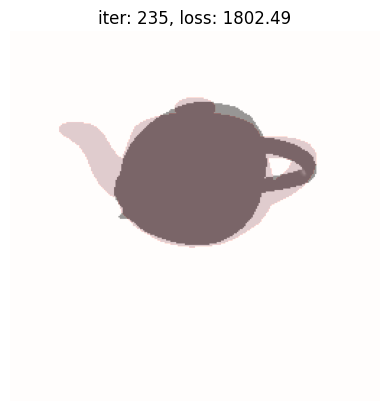

 95%|█████████▍| 237/250 [29:37<02:26, 11.29s/it]

iteration: 236, loss: 1802.3544921875


 95%|█████████▌| 238/250 [29:49<02:15, 11.30s/it]

iteration: 237, loss: 1802.4266357421875


 96%|█████████▌| 239/250 [30:00<02:04, 11.33s/it]

iteration: 238, loss: 1802.489501953125


 96%|█████████▌| 240/250 [30:12<01:54, 11.42s/it]

iteration: 239, loss: 1802.5391845703125


 96%|█████████▌| 240/250 [30:23<01:54, 11.42s/it]

iteration: 240, loss: 1802.54296875


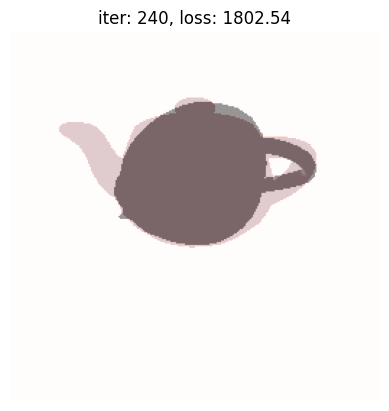

 97%|█████████▋| 242/250 [30:35<01:33, 11.68s/it]

iteration: 241, loss: 1802.5418701171875


 97%|█████████▋| 243/250 [30:47<01:21, 11.60s/it]

iteration: 242, loss: 1802.547607421875


 98%|█████████▊| 244/250 [30:58<01:09, 11.53s/it]

iteration: 243, loss: 1802.4583740234375


 98%|█████████▊| 245/250 [31:10<00:57, 11.45s/it]

iteration: 244, loss: 1802.39013671875


 98%|█████████▊| 245/250 [31:21<00:57, 11.45s/it]

iteration: 245, loss: 1802.3583984375


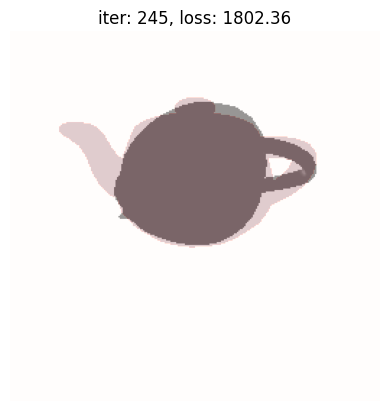

 99%|█████████▉| 247/250 [31:32<00:34, 11.42s/it]

iteration: 246, loss: 1802.3731689453125


 99%|█████████▉| 248/250 [31:44<00:22, 11.37s/it]

iteration: 247, loss: 1802.37109375


100%|█████████▉| 249/250 [31:56<00:11, 11.54s/it]

iteration: 248, loss: 1802.3719482421875


100%|██████████| 250/250 [32:07<00:00,  7.71s/it]


iteration: 249, loss: 1802.3809814453125


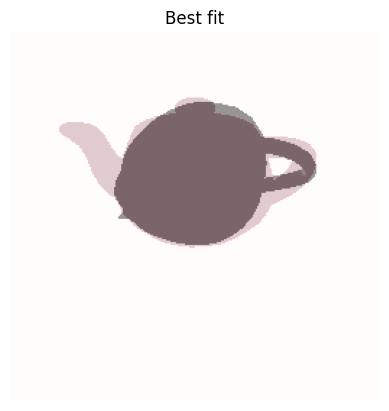

In [83]:
losses, parameter_updates, R_min, T_min = train_angle_axis_model(teapot_mesh, silhoutte_gt_teapot, R_init, T_init, silhoutte_renderer, phong_renderer, obj_name, 250, device)

## Teapot (Another initialisation)

In [10]:
teapot_path = "data/teapot.obj"
obj_name = teapot_path.split(".")[-2].split("/")[-1]
obj_name = obj_name + "_1"
print("Loading", obj_name)
teapot_mesh = load_mesh(teapot_path, device=device, scale=1)
silhoutte_renderer, phong_renderer = get_renderers(image_size=256, device=device)

Loading teapot_1


/opt/anaconda3/envs/mr_env/lib/python3.8/site-packages/pytorch3d/io/obj_io.py:546: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


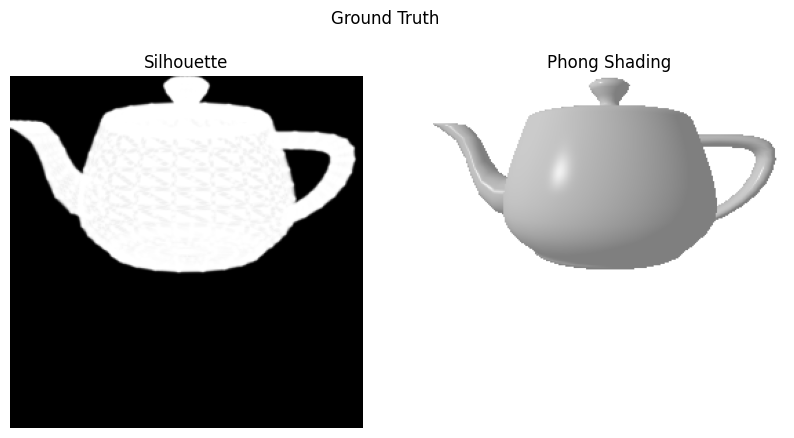

In [11]:
# Ground truth parameters

params = {
    "dist": -2,
    "elev": -15,
    "azim": 5
}

silhoutte_gt_teapot, phong_gt_teapot, R_gt, T_gt = get_ground_truth(teapot_mesh, silhoutte_renderer, phong_renderer, params, device)
plot_images(silhoutte_gt_teapot, phong_gt_teapot)

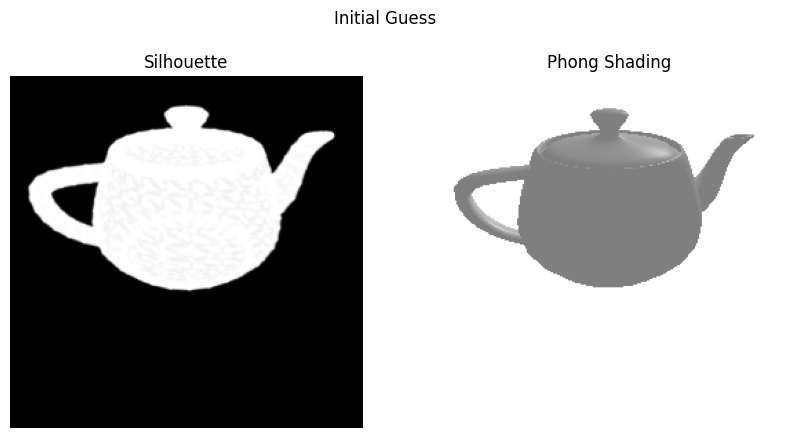

In [12]:
variances = {
    "dist": 2,
    "elev": 30,
    "azim": 30
}

# # Initial guess for R and T
# R_init, T_init = get_initial_R_T(params=params, variances=variances, deltaT=0.5, device=device)

# # save R and T to a file
# np.save("data/teapot_R_init_2.npy", R_init.cpu().numpy())
# np.save("data/teapot_T_init_2.npy", T_init.cpu().numpy())

# read R and T from a file
R_init = torch.tensor(np.load("data/teapot_R_init_2.npy")).to(device)
T_init = torch.tensor(np.load("data/teapot_T_init_2.npy")).to(device)

plot_initial_guess(teapot_mesh, silhoutte_renderer, phong_renderer, R_init, T_init)

In [ ]:
losses, parameter_updates, R_min, T_min = train_angle_axis_model(teapot_mesh, silhoutte_gt_teapot, R_init, T_init, silhoutte_renderer, phong_renderer, obj_name, 25, device)

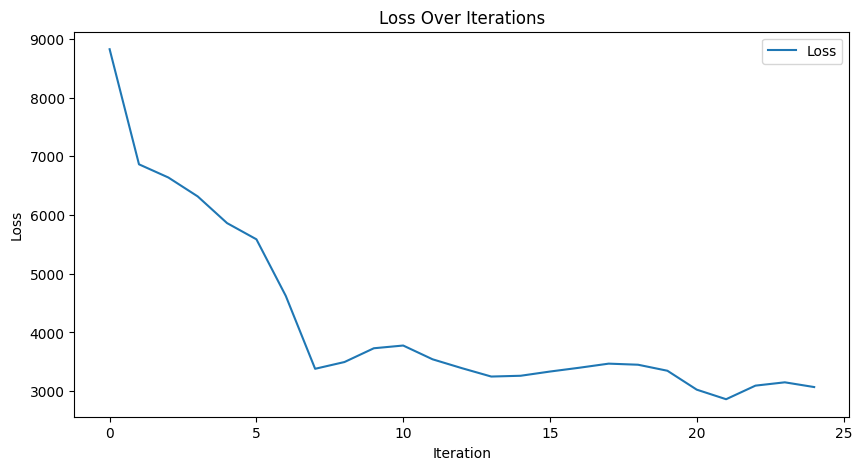

In [24]:
plot_losses(losses)

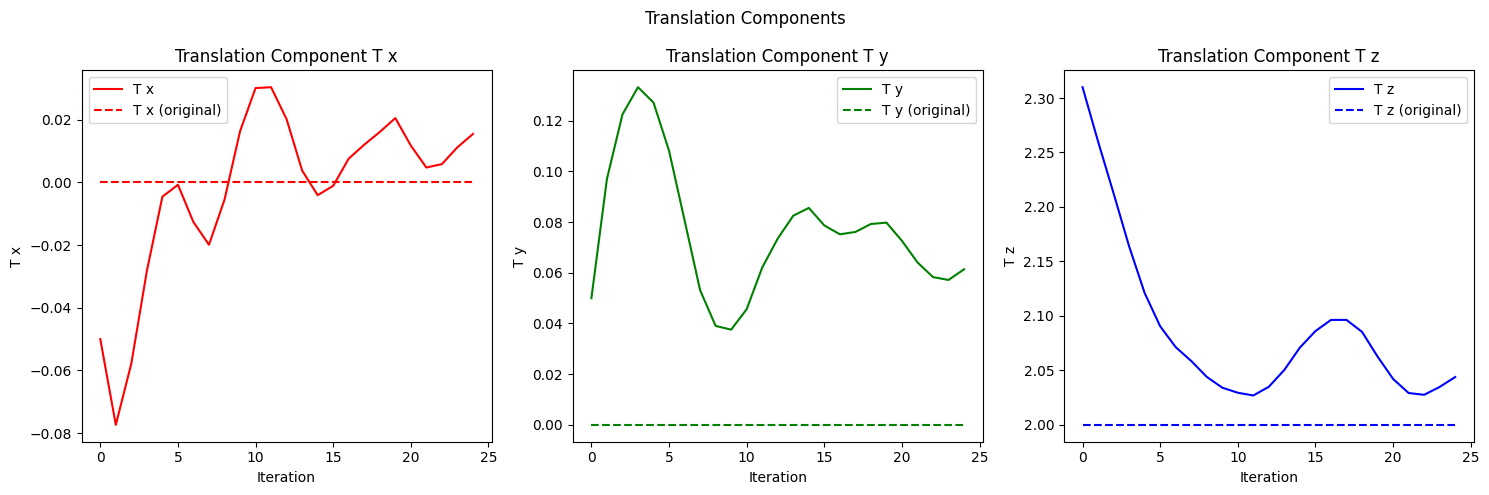

In [25]:
plot_translations(T_gt, parameter_updates)

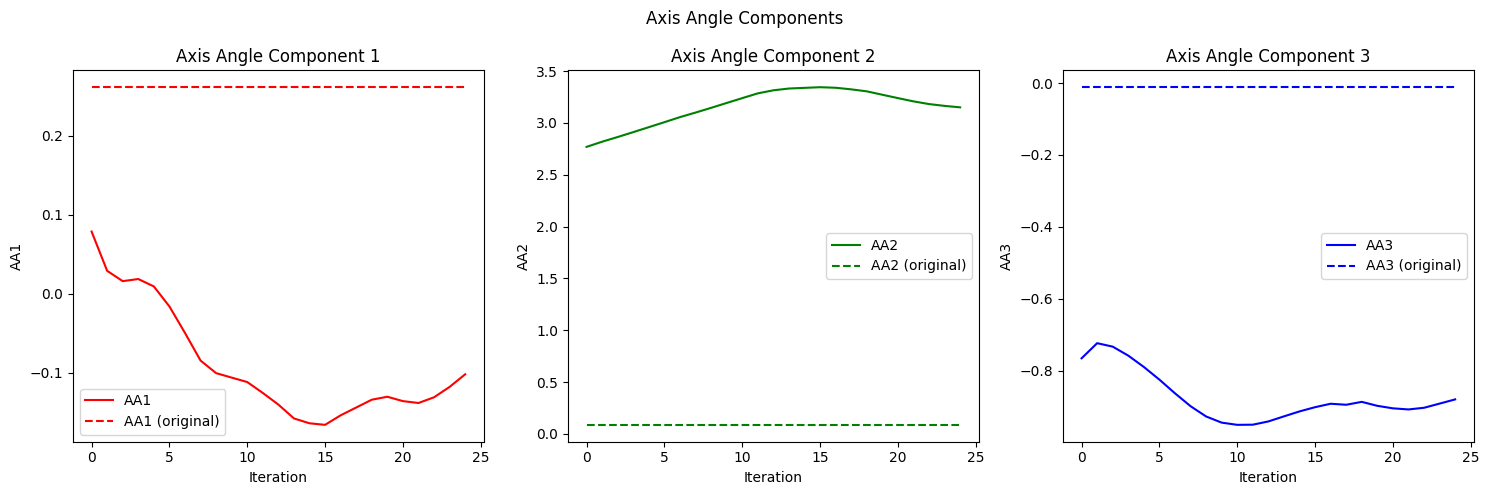

In [26]:
plot_axis_angles(R_gt, parameter_updates)

# 2. Bunny

In [4]:
bunny_path = "data/bunny.obj"
obj_name = bunny_path.split(".")[-2].split("/")[-1]
obj_name = obj_name
print("Loading", obj_name)
bunny_mesh = load_mesh(bunny_path, device=device, scale=1)
silhoutte_renderer, phong_renderer = get_renderers(image_size=256, device=device)

Loading bunny


/opt/anaconda3/envs/mr_env/lib/python3.8/site-packages/pytorch3d/io/obj_io.py:546: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


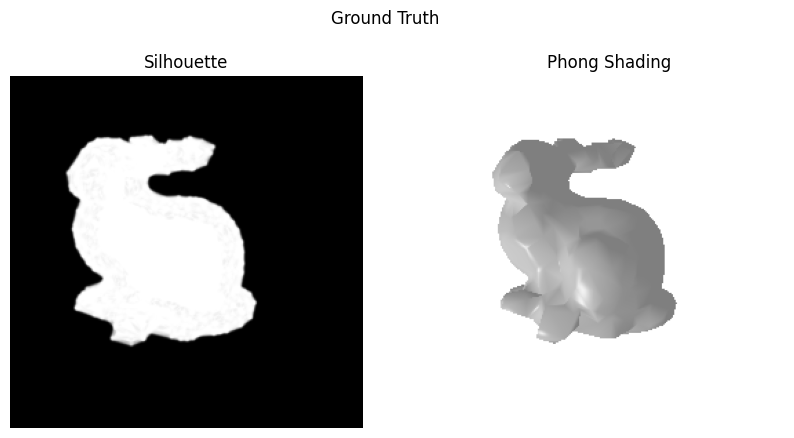

In [5]:
# Ground truth parameters

params = {
    "dist": -1.5,
    "elev": 270,
    "azim": 15
}

silhoutte_gt_bunny, phong_gt_bunny, R_gt, T_gt = get_ground_truth(bunny_mesh, silhoutte_renderer, phong_renderer, params, device)
plot_images(silhoutte_gt_bunny, phong_gt_bunny)

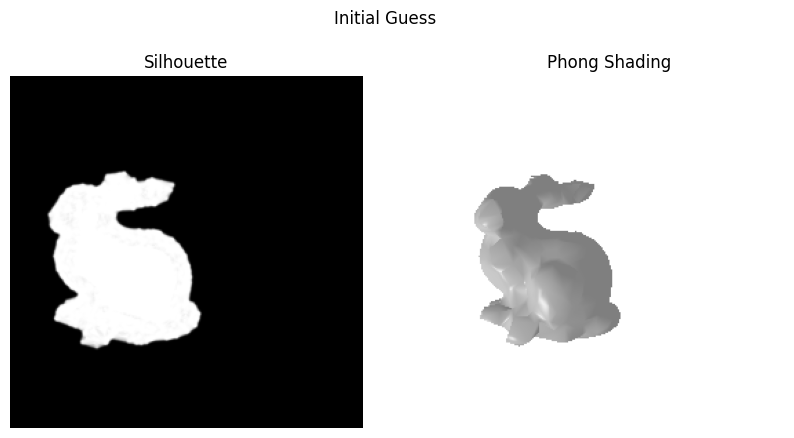

In [7]:
variances = {
    "dist": 0,
    "elev": 0,
    "azim": 0.5
}

# Initial guess for R and T
R_init, T_init = get_initial_R_T(params=params, variances=variances, deltaT=0.5, device=device)

# save R or(np.land T to a file
np.save("data/bunny_R_init.npy", R_init.cpu().numpy())
np.save("data/bunny_T_init.npy", T_init.cpu().numpy())

# read R and T from a file
R_init = torch.tensor(np.load("data/bunny_R_init.npy")).to(device)
T_init = torch.tensor(np.load("data/bunny_T_init.npy")).to(device)

plot_initial_guess(bunny_mesh, silhoutte_renderer, phong_renderer, R_init, T_init)

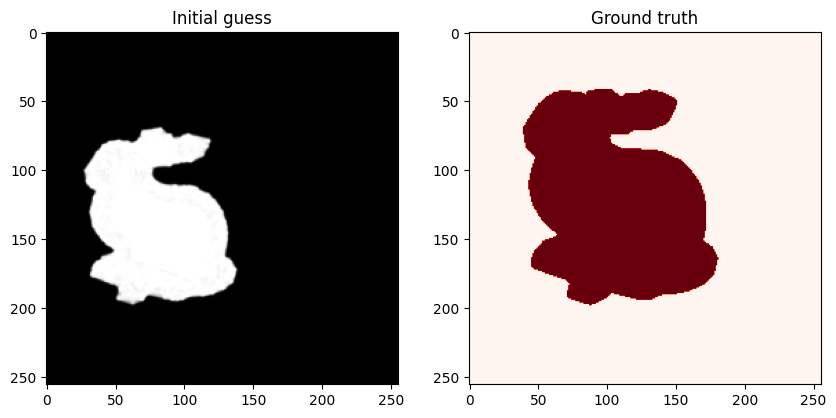

  0%|          | 0/30 [00:10<?, ?it/s]

iteration: 0, loss: 10001.15234375


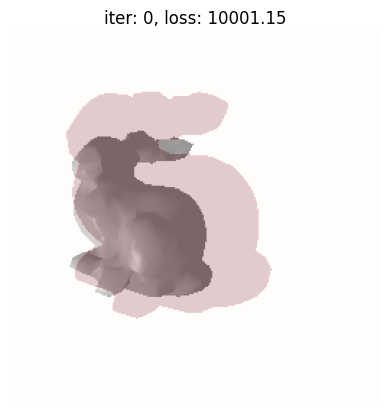

  7%|▋         | 2/30 [00:19<04:34,  9.80s/it]

iteration: 1, loss: 8392.9384765625


 10%|█         | 3/30 [00:28<04:15,  9.47s/it]

iteration: 2, loss: 8289.9638671875


 13%|█▎        | 4/30 [00:38<04:04,  9.41s/it]

iteration: 3, loss: 8043.7353515625


 17%|█▋        | 5/30 [00:47<03:57,  9.48s/it]

iteration: 4, loss: 7426.3037109375


 17%|█▋        | 5/30 [00:57<03:57,  9.48s/it]

iteration: 5, loss: 6585.76220703125


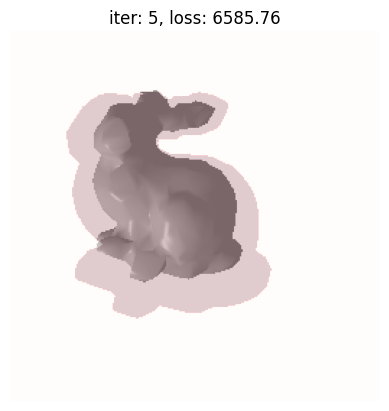

 23%|██▎       | 7/30 [01:07<03:44,  9.75s/it]

iteration: 6, loss: 5926.380859375


 27%|██▋       | 8/30 [01:17<03:37,  9.87s/it]

iteration: 7, loss: 5659.607421875


 30%|███       | 9/30 [01:28<03:30, 10.04s/it]

iteration: 8, loss: 5033.2734375


 33%|███▎      | 10/30 [01:38<03:24, 10.21s/it]

iteration: 9, loss: 4194.9833984375


 33%|███▎      | 10/30 [01:49<03:24, 10.21s/it]

iteration: 10, loss: 3427.956787109375


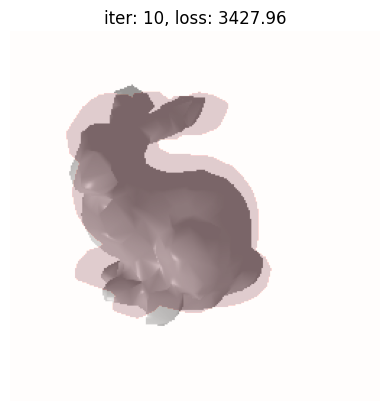

 40%|████      | 12/30 [02:00<03:10, 10.60s/it]

iteration: 11, loss: 3249.94580078125


 43%|████▎     | 13/30 [02:12<03:03, 10.78s/it]

iteration: 12, loss: 3358.872314453125


 47%|████▋     | 14/30 [02:23<02:57, 11.06s/it]

iteration: 13, loss: 3685.967041015625


 50%|█████     | 15/30 [02:35<02:49, 11.29s/it]

iteration: 14, loss: 3700.87353515625


 50%|█████     | 15/30 [02:47<02:49, 11.29s/it]

iteration: 15, loss: 3500.67333984375


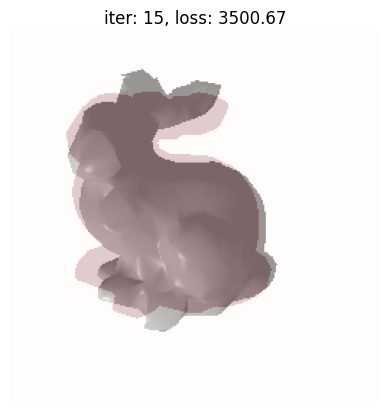

 57%|█████▋    | 17/30 [02:59<02:30, 11.54s/it]

iteration: 16, loss: 3163.59130859375


 60%|██████    | 18/30 [03:10<02:18, 11.56s/it]

iteration: 17, loss: 2790.537109375


 63%|██████▎   | 19/30 [03:22<02:07, 11.61s/it]

iteration: 18, loss: 2476.91064453125


 67%|██████▋   | 20/30 [03:34<01:55, 11.59s/it]

iteration: 19, loss: 2093.131591796875


 67%|██████▋   | 20/30 [03:45<01:55, 11.59s/it]

iteration: 20, loss: 1512.081298828125


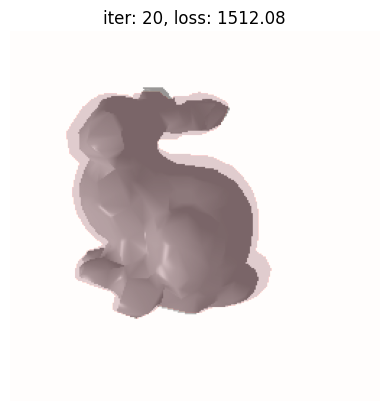

 73%|███████▎  | 22/30 [03:57<01:32, 11.55s/it]

iteration: 21, loss: 1515.06201171875


 77%|███████▋  | 23/30 [04:08<01:19, 11.40s/it]

iteration: 22, loss: 1714.16748046875


 80%|████████  | 24/30 [04:19<01:08, 11.47s/it]

iteration: 23, loss: 1816.0185546875


 83%|████████▎ | 25/30 [04:31<00:57, 11.51s/it]

iteration: 24, loss: 1540.3955078125


 83%|████████▎ | 25/30 [04:43<00:57, 11.51s/it]

iteration: 25, loss: 1181.047607421875


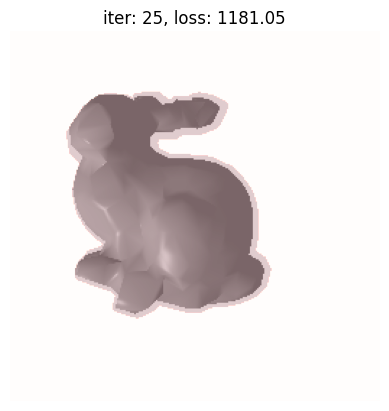

 90%|█████████ | 27/30 [04:55<00:34, 11.64s/it]

iteration: 26, loss: 895.8818359375


 93%|█████████▎| 28/30 [05:06<00:23, 11.68s/it]

iteration: 27, loss: 773.391845703125


 97%|█████████▋| 29/30 [05:18<00:11, 11.76s/it]

iteration: 28, loss: 1154.019287109375


100%|██████████| 30/30 [05:30<00:00, 11.03s/it]


iteration: 29, loss: 1281.7200927734375


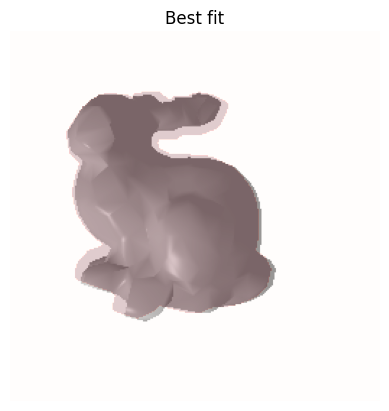

In [8]:
losses, parameter_updates, R_min, T_min = train_angle_axis_model(bunny_mesh, silhoutte_gt_bunny, R_init, T_init, silhoutte_renderer, phong_renderer, obj_name, 30, device)

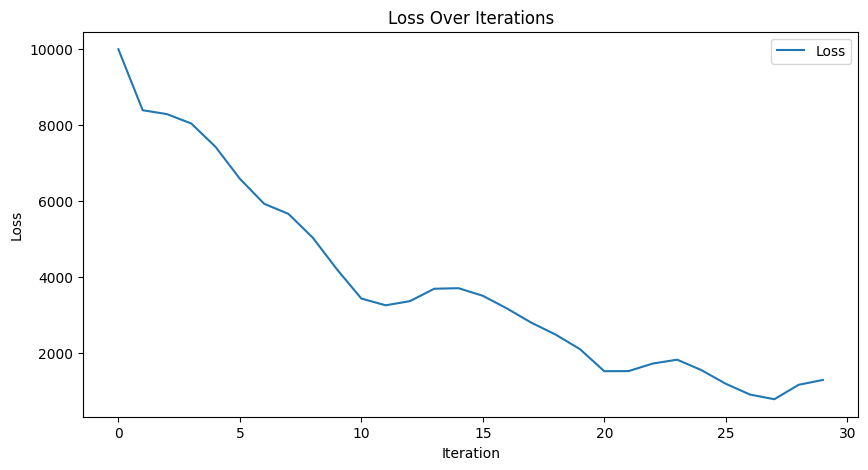

In [9]:
plot_losses(losses)

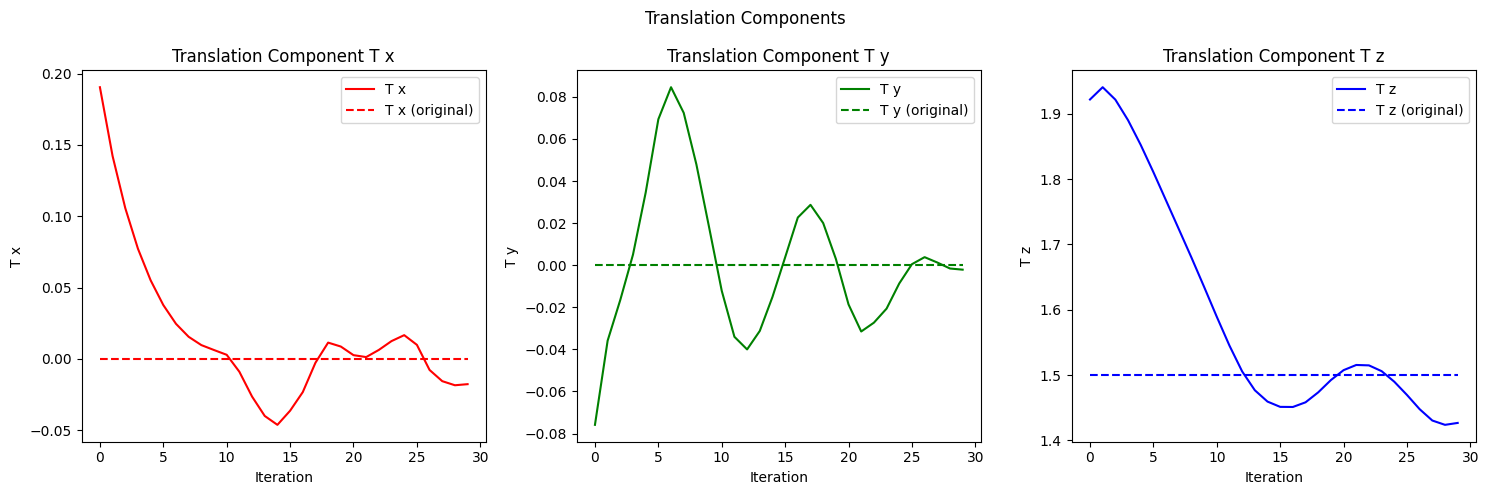

In [10]:
plot_translations(T_gt, parameter_updates)

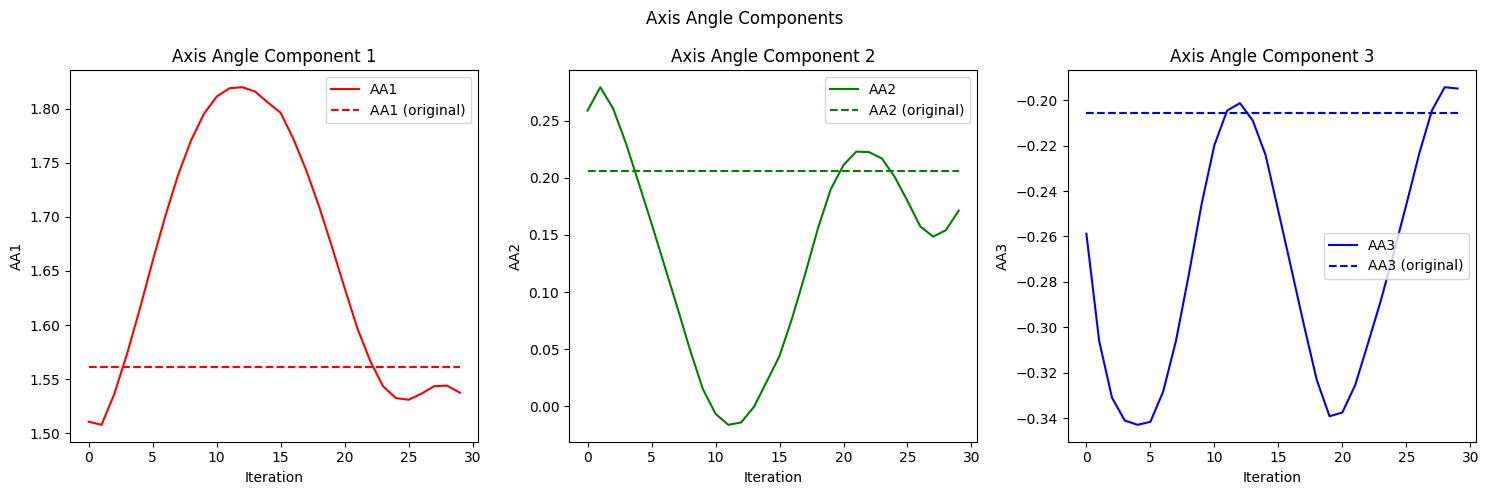

In [11]:
plot_axis_angles(R_gt, parameter_updates)